In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
from dotenv import load_dotenv
import requests
import json
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from ydata_profiling import ProfileReport
import pickle
import missingno as msno
from fuzzywuzzy import process

C:\Users\Brendan\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
load_dotenv()

True

*****
**Import Zillow Statistics**
*****

In [5]:
#Zillow data from .csv (pending access to API, wait time of ~10days for approval)
zillow_state_urls = {"state_hvi": "https://files.zillowstatic.com/research/public_csvs/zhvi/State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv?t=1711137595"
}
zillow_zip_urls = {"zip_hvi": "https://files.zillowstatic.com/research/public_csvs/zhvi/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv?t=1711136613"
}
zillow_metro_urls = {
    "metro_hvi": "https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv?t=1711136613"
    ,"metro_rent": "https://files.zillowstatic.com/research/public_csvs/zori/Metro_zori_uc_sfr_sm_month.csv?t=1711136613"
    ,"metro_for_sale_inventory": "https://files.zillowstatic.com/research/public_csvs/invt_fs/Metro_invt_fs_uc_sfr_sm_month.csv?t=1711136613"
    ,"metro_new_listing": "https://files.zillowstatic.com/research/public_csvs/new_listings/Metro_new_listings_uc_sfrcondo_sm_month.csv?t=1711136613"
    ,"metro_pct_abv_list": "https://files.zillowstatic.com/research/public_csvs/pct_sold_above_list/Metro_pct_sold_above_list_uc_sfrcondo_sm_month.csv?t=1711136613"
    ,"metro_pct_blw_list": "https://files.zillowstatic.com/research/public_csvs/pct_sold_below_list/Metro_pct_sold_below_list_uc_sfrcondo_month.csv?t=1711136613"
    ,"metro_med_days_to_close": "https://files.zillowstatic.com/research/public_csvs/median_days_to_close/Metro_median_days_to_close_uc_sfrcondo_sm_month.csv?t=1711136613"
    ,"metro_pct_w_pricecut": "https://files.zillowstatic.com/research/public_csvs/perc_listings_price_cut/Metro_perc_listings_price_cut_uc_sfr_sm_month.csv?t=1711136613"
    ,"metro_new_construct": "https://files.zillowstatic.com/research/public_csvs/new_con_sales_count_raw/Metro_new_con_sales_count_raw_uc_sfr_month.csv?t=1711136613"
}

**Import: State level data**

In [6]:
#Create dictionary from state name to abbreviation
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [7]:
#Import Zillow state level HVI data from .csv (pending access to API, wait time of ~10days for approval)

url = zillow_state_urls['state_hvi']
zillow_state_df = pd.read_csv(url)
zillow_state_df = zillow_state_df.drop(['SizeRank','StateName'], axis=1)
zillow_state_df['metric'] = 'state_hvi'

zillow_state_df.iloc[:,:6].head()

,RegionID,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31
0,9,California,state,198015.154744,198676.181513,199561.592566
1,54,Texas,state,112291.632961,112349.870416,112378.033052
2,14,Florida,state,113339.264735,113592.694847,113895.111972
3,43,New York,state,137303.237648,137762.790319,138210.111566
4,47,Pennsylvania,state,99025.316196,99234.430878,99433.497568


In [8]:
zillow_state_df.iloc[:,:6].describe()

,RegionID,2000-01-31,2000-02-29,2000-03-31
count,51.000000,47.000000,47.000000,47.000000
mean,33.137255,129284.697661,129495.953688,129759.940556
std,17.260382,35943.968718,36064.939838,36236.731679
min,3.000000,73185.042512,73182.011910,73206.604974
25%,19.500000,104966.297514,105106.207540,105237.036559
50%,34.000000,123090.605690,123015.668634,123061.786888
75%,46.500000,152010.971821,152296.217833,152595.720146
max,62.000000,227386.888660,227392.242723,227805.720599


In [9]:
zillow_state_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 295 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    RegionID    51 non-null     int64  
 1    RegionName  51 non-null     object 
 2    RegionType  51 non-null     object 
 3    2000-01-31  47 non-null     float64
 4    2000-02-29  47 non-null     float64
 5    2000-03-31  47 non-null     float64
 6    2000-04-30  47 non-null     float64
 7    2000-05-31  47 non-null     float64
 8    2000-06-30  47 non-null     float64
 9    2000-07-31  47 non-null     float64
 10   2000-08-31  47 non-null     float64
 11   2000-09-30  47 non-null     float64
 12   2000-10-31  47 non-null     float64
 13   2000-11-30  47 non-null     float64
 14   2000-12-31  47 non-null     float64
 15   2001-01-31  47 non-null     float64
 16   2001-02-28  47 non-null     float64
 17   2001-03-31  47 non-null     float64
 18   2001-04-30  47 non-null     float64
 19   2001-05-

In [10]:
#Add state abbreviation as 'state' column
zillow_state_df['State'] = zillow_state_df['RegionName'].map(us_state_to_abbrev)
zillow_state_df = zillow_state_df.drop(['RegionID'], axis=1)

In [11]:
#Reshape Zillow data from wide to long

zillow_state_df_long = pd.melt(zillow_state_df, id_vars=['State','RegionName','RegionType','metric'])
zillow_state_df_long["variable"] = pd.to_datetime(zillow_state_df_long["variable"])
zillow_state_df_long = zillow_state_df_long.sort_values(["variable","State"])
zillow_state_df_long = zillow_state_df_long.rename(columns={'value':'state_HVI'})
zillow_state_df_long = zillow_state_df_long.set_index('variable')

zillow_state_df_long

,State,RegionName,RegionType,metric,state_HVI
variable,,,,,
2000-01-31,AK,Alaska,state,state_hvi,134050.488951
2000-01-31,AL,Alabama,state,state_hvi,98522.947066
2000-01-31,AR,Arkansas,state,state_hvi,86316.317600
2000-01-31,AZ,Arizona,state,state_hvi,138432.405665
2000-01-31,CA,California,state,state_hvi,198015.154744
...,...,...,...,...,...
2024-03-31,VT,Vermont,state,state_hvi,384416.422941
2024-03-31,WA,Washington,state,state_hvi,605769.588316
2024-03-31,WI,Wisconsin,state,state_hvi,298246.778571


In [12]:
zillow_state_df_long.describe()

,state_HVI
count,1.461100e+04
mean,2.223741e+05
std,1.203730e+05
min,7.318201e+04
25%,1.394586e+05
50%,1.905398e+05
75%,2.631565e+05
max,1.025691e+06


In [13]:
zillow_state_df_long.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14841 entries, 2000-01-31 to 2024-03-31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14841 non-null  object 
 1   RegionName  14841 non-null  object 
 2   RegionType  14841 non-null  object 
 3   metric      14841 non-null  object 
 4   state_HVI   14611 non-null  float64
dtypes: float64(1), object(4)
memory usage: 695.7+ KB


<Axes: >

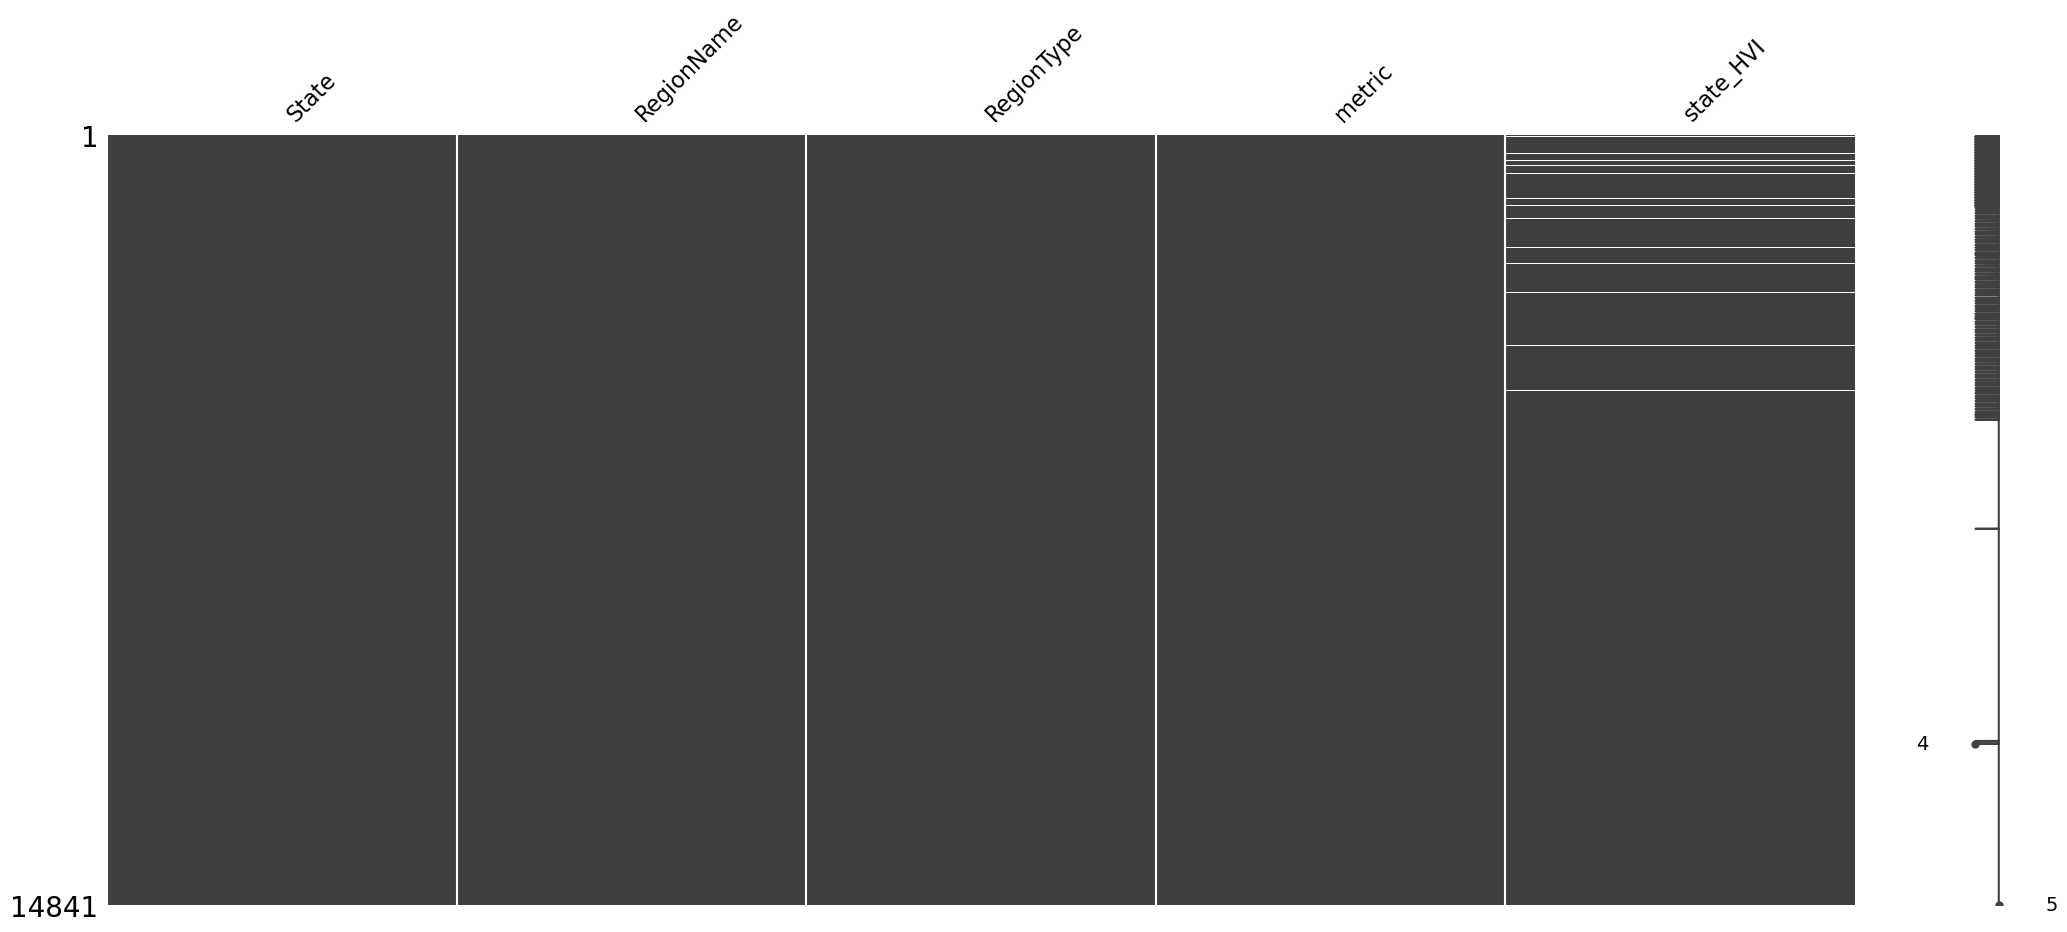

In [14]:
msno.matrix(zillow_state_df_long)

**Import: Metro level data**

In [15]:
#Import Zillow metro level data from .csv (pending access to API, wait time of ~10days for approval)

dfs = []
for metric in zillow_metro_urls:
    url = zillow_metro_urls[metric]
    df_z = pd.read_csv(url) 
    df_z['metric'] = metric
    dfs.append(df_z)

zillow_metro_df = pd.concat(dfs)

zillow_metro_df = zillow_metro_df.drop(['SizeRank'], axis=1)
zillow_metro_df.iloc[:,:5].head()

,RegionID,RegionName,RegionType,StateName,2000-01-31
0,102001,United States,country,NaN,122360.594766
1,394913,"New York, NY",msa,NY,215999.952670
2,753899,"Los Angeles, CA",msa,CA,241545.913605
3,394463,"Chicago, IL",msa,IL,156914.544255
4,394514,"Dallas, TX",msa,TX,128760.424416


In [16]:
zillow_metro_df.iloc[:,:5].describe()

,RegionID,2000-01-31
count,6135.000000,431.000000
mean,419264.463896,110243.922939
std,95327.985095,52385.072219
min,102001.000000,27890.770864
25%,394550.000000,77479.765759
50%,394802.000000,97099.107097
75%,395059.000000,127093.687431
max,845172.000000,416267.481093


In [17]:
zillow_metro_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6135 entries, 0 to 316
Data columns (total 296 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    RegionID    6135 non-null   int64  
 1    RegionName  6135 non-null   object 
 2    RegionType  6135 non-null   object 
 3    StateName   6126 non-null   object 
 4    2000-01-31  431 non-null    float64
 5    2000-02-29  432 non-null    float64
 6    2000-03-31  433 non-null    float64
 7    2000-04-30  435 non-null    float64
 8    2000-05-31  437 non-null    float64
 9    2000-06-30  438 non-null    float64
 10   2000-07-31  439 non-null    float64
 11   2000-08-31  440 non-null    float64
 12   2000-09-30  441 non-null    float64
 13   2000-10-31  441 non-null    float64
 14   2000-11-30  444 non-null    float64
 15   2000-12-31  445 non-null    float64
 16   2001-01-31  453 non-null    float64
 17   2001-02-28  453 non-null    float64
 18   2001-03-31  453 non-null    float64
 19   2001-04-30

In [18]:
#Reshape Zillow data from wide to long for dates

zillow_metro_df_long = pd.melt(zillow_metro_df, id_vars=['RegionID','RegionName','RegionType','StateName','metric'])
zillow_metro_df_long["variable"] = pd.to_datetime(zillow_metro_df_long["variable"])
zillow_metro_df_long = zillow_metro_df_long.sort_values(["RegionID","variable"])

zillow_metro_df_long

,RegionID,RegionName,RegionType,StateName,metric,variable,value
0,102001,United States,country,NaN,metro_hvi,2000-01-31,122360.594766
895,102001,United States,country,NaN,metro_rent,2000-01-31,NaN
1384,102001,United States,country,NaN,metro_for_sale_inventory,2000-01-31,NaN
2312,102001,United States,country,NaN,metro_new_listing,2000-01-31,NaN
3235,102001,United States,country,NaN,metro_pct_abv_list,2000-01-31,NaN
...,...,...,...,...,...,...,...
1776087,845172,"Winfield, KS",msa,KS,metro_new_listing,2024-02-29,24.000000
1778666,845172,"Winfield, KS",msa,KS,metro_pct_w_pricecut,2024-02-29,0.186402
1781294,845172,"Winfield, KS",msa,KS,metro_for_sale_inventory,2024-03-31,121.000000
1782222,845172,"Winfield, KS",msa,KS,metro_new_listing,2024-03-31,25.000000


In [19]:
zillow_metro_df_long.describe()

,RegionID,variable,value
count,1.785285e+06,1785285,5.479890e+05
mean,4.192645e+05,2012-02-29 13:16:42.061856256,6.939945e+04
min,1.020010e+05,2000-01-31 00:00:00,0.000000e+00
25%,3.945500e+05,2006-01-31 00:00:00,2.000000e+01
50%,3.948020e+05,2012-02-29 00:00:00,4.820000e+02
75%,3.950590e+05,2018-03-31 00:00:00,1.208839e+05
max,8.451720e+05,2024-03-31 00:00:00,1.805552e+06
std,9.532024e+04,NaN,1.168107e+05


In [20]:
zillow_metro_df_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1785285 entries, 0 to 1784801
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   RegionName  object        
 2   RegionType  object        
 3   StateName   object        
 4   metric      object        
 5   variable    datetime64[ns]
 6   value       float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 109.0+ MB


In [21]:
#Reshape Zillow data from long to wide for metrics
zillow_metro_df_metrics = zillow_metro_df_long.pivot_table(
    index=['RegionID','RegionName','RegionType','StateName','variable'],
    columns='metric',
    values='value'
)
zillow_metro_df_metrics = zillow_metro_df_metrics.reset_index()
zillow_metro_df_metrics["RegionID"] = zillow_metro_df_metrics["RegionID"].astype(str)
zillow_metro_df_metrics.sort_values(by='variable',inplace=True)
zillow_metro_df_metrics = zillow_metro_df_metrics.set_index('variable')

zillow_metro_df_metrics

metric,RegionID,RegionName,RegionType,StateName,metro_for_sale_inventory,metro_hvi,metro_med_days_to_close,metro_new_construct,metro_new_listing,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut,metro_rent
variable,,,,,,,,,,,,,
2000-01-31,394570,"Enid, OK",msa,OK,NaN,69769.242087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,394632,"Glasgow, KY",msa,KY,NaN,59622.707074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,394484,"Colorado Springs, CO",msa,CO,NaN,165157.510870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,394501,"Corning, NY",msa,NY,NaN,77345.158353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,395047,"Saginaw, MI",msa,MI,NaN,78918.912748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,394957,"Palm Bay, FL",msa,FL,3158.0,365323.030303,NaN,NaN,1172.0,NaN,NaN,0.316012,2251.156492
2024-03-31,394369,"Bay City, MI",msa,MI,209.0,160261.764901,NaN,NaN,83.0,NaN,NaN,0.199739,1000.000000
2024-03-31,394700,"Huron, SD",msa,SD,52.0,189374.829905,NaN,NaN,15.0,NaN,NaN,0.102366,NaN


In [22]:
zillow_metro_df_metrics.describe()

metric,metro_for_sale_inventory,metro_hvi,metro_med_days_to_close,metro_new_construct,metro_new_listing,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut,metro_rent
count,66479.000000,2.108940e+05,30990.000000,17515.000000,64370.000000,30951.000000,31657.000000,66024.000000,28196.000000
mean,1057.815506,1.788527e+05,34.985963,126.877534,411.507705,0.292576,0.522142,0.161099,1607.847382
std,3030.502596,1.243310e+05,7.205334,219.903576,1240.483617,0.152464,0.160877,0.053175,867.643189
min,4.000000,2.782522e+04,7.000000,5.000000,4.000000,0.000000,0.031250,0.009804,574.227766
25%,149.000000,1.072068e+05,31.000000,22.000000,43.000000,0.173942,0.407407,0.122651,1154.768448
50%,307.000000,1.436405e+05,34.000000,48.000000,92.000000,0.263102,0.529412,0.155999,1427.220177
75%,730.000000,2.055137e+05,38.000000,136.000000,251.000000,0.386134,0.640000,0.193992,1831.409730
max,71432.000000,1.805552e+06,78.000000,2488.000000,25154.000000,0.858032,1.000000,0.483076,21222.222222


In [23]:
zillow_metro_df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212457 entries, 2000-01-31 to 2024-03-31
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RegionID                  212457 non-null  object 
 1   RegionName                212457 non-null  object 
 2   RegionType                212457 non-null  object 
 3   StateName                 212457 non-null  object 
 4   metro_for_sale_inventory  66479 non-null   float64
 5   metro_hvi                 210894 non-null  float64
 6   metro_med_days_to_close   30990 non-null   float64
 7   metro_new_construct       17515 non-null   float64
 8   metro_new_listing         64370 non-null   float64
 9   metro_pct_abv_list        30951 non-null   float64
 10  metro_pct_blw_list        31657 non-null   float64
 11  metro_pct_w_pricecut      66024 non-null   float64
 12  metro_rent                28196 non-null   float64
dtypes: float64(9), object(4)
mem

In [24]:
#confirm all metros are in only 1 state
temp = pd.DataFrame(zillow_metro_df_metrics.RegionName.unique())
temp[[0,1]] = temp[0].str.split(',', expand=True)
temp = temp.sort_values(by=1)
temp[1].unique()

array([' AK', ' AL', ' AR', ' AZ', ' CA', ' CO', ' CT', ' DC', ' DE',
       ' FL', ' GA', ' HI', ' IA', ' ID', ' IL', ' IN', ' KS', ' KY',
       ' LA', ' MA', ' MD', ' ME', ' MI', ' MN', ' MO', ' MS', ' MT',
       ' NC', ' ND', ' NE', ' NH', ' NJ', ' NM', ' NV', ' NY', ' OH',
       ' OK', ' OR', ' PA', ' RI', ' SC', ' SD', ' TN', ' TX', ' UT',
       ' VA', ' VT', ' WA', ' WI', ' WV', ' WY'], dtype=object)

<Axes: >

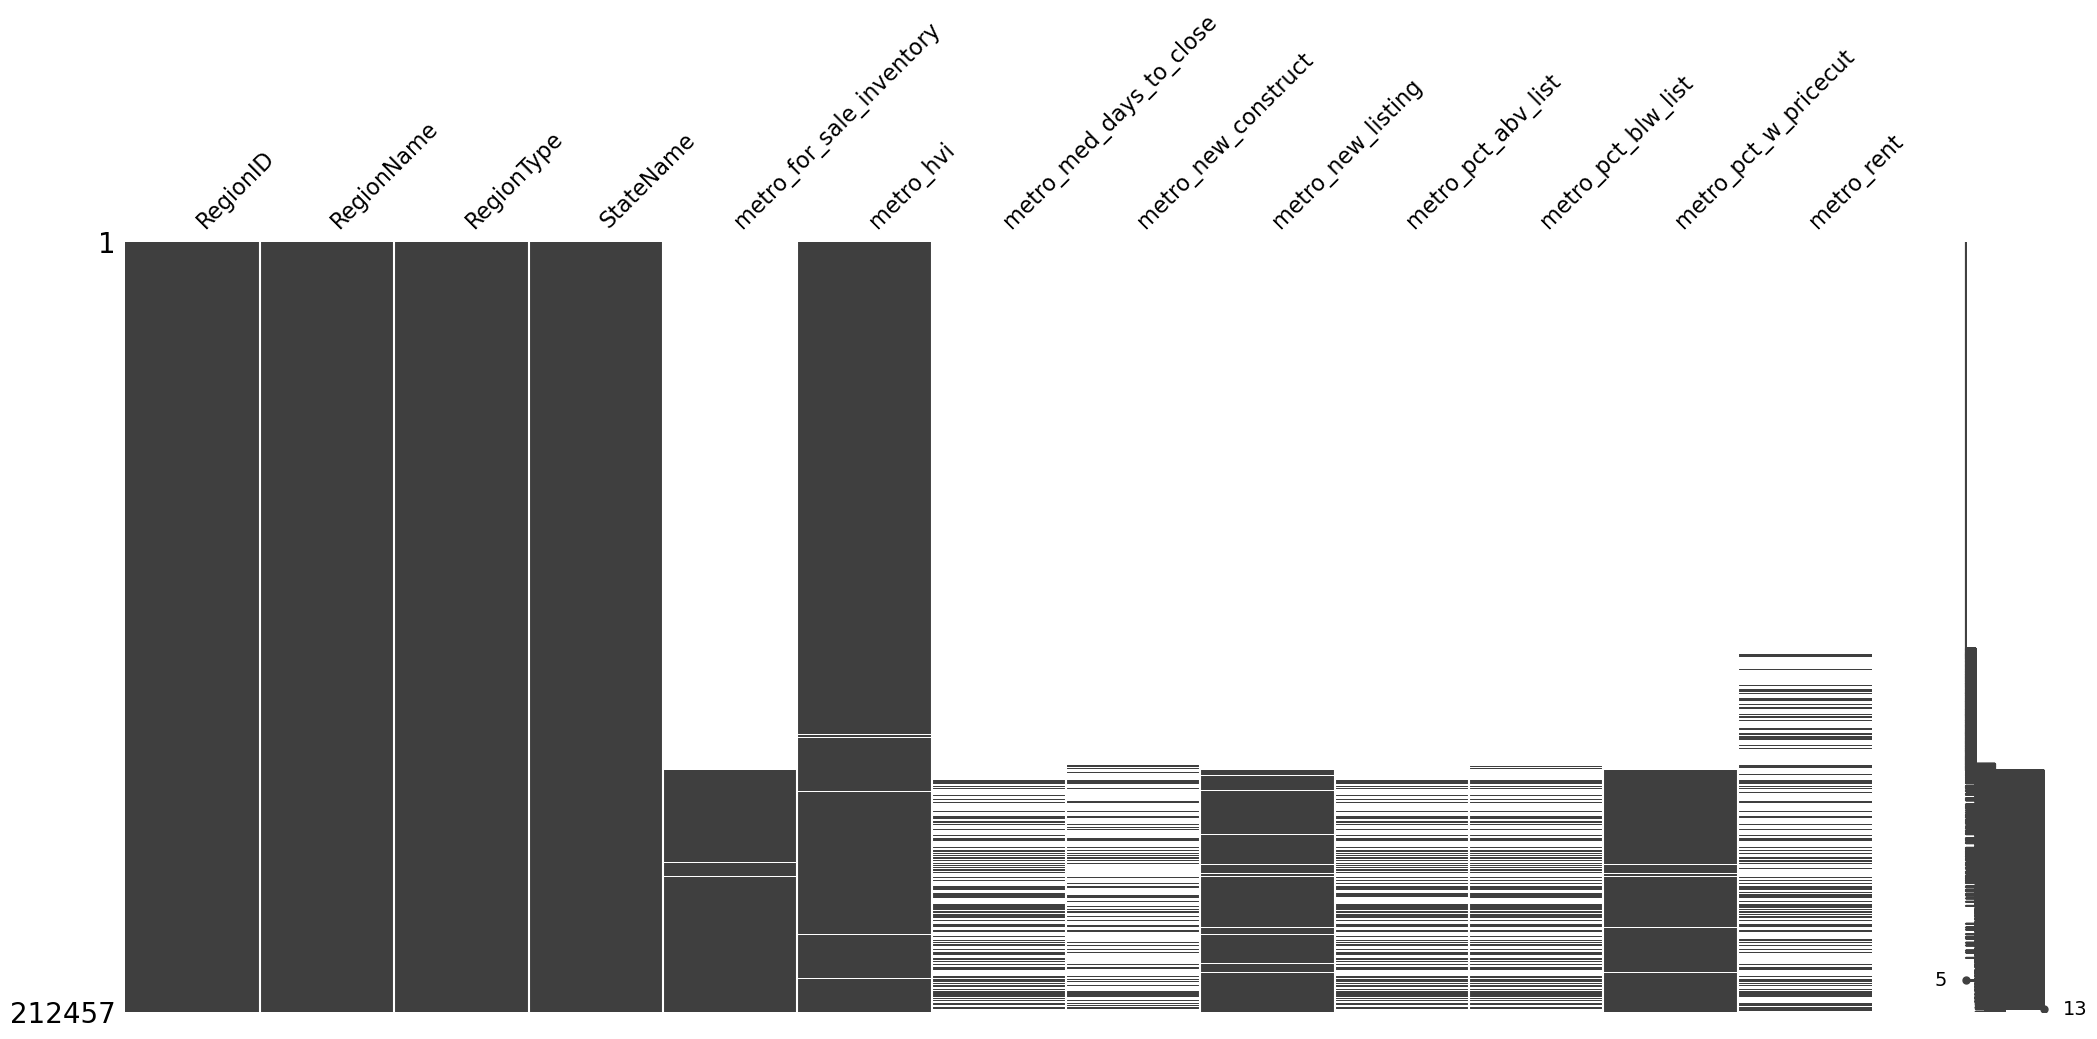

In [25]:
msno.matrix(zillow_metro_df_metrics)

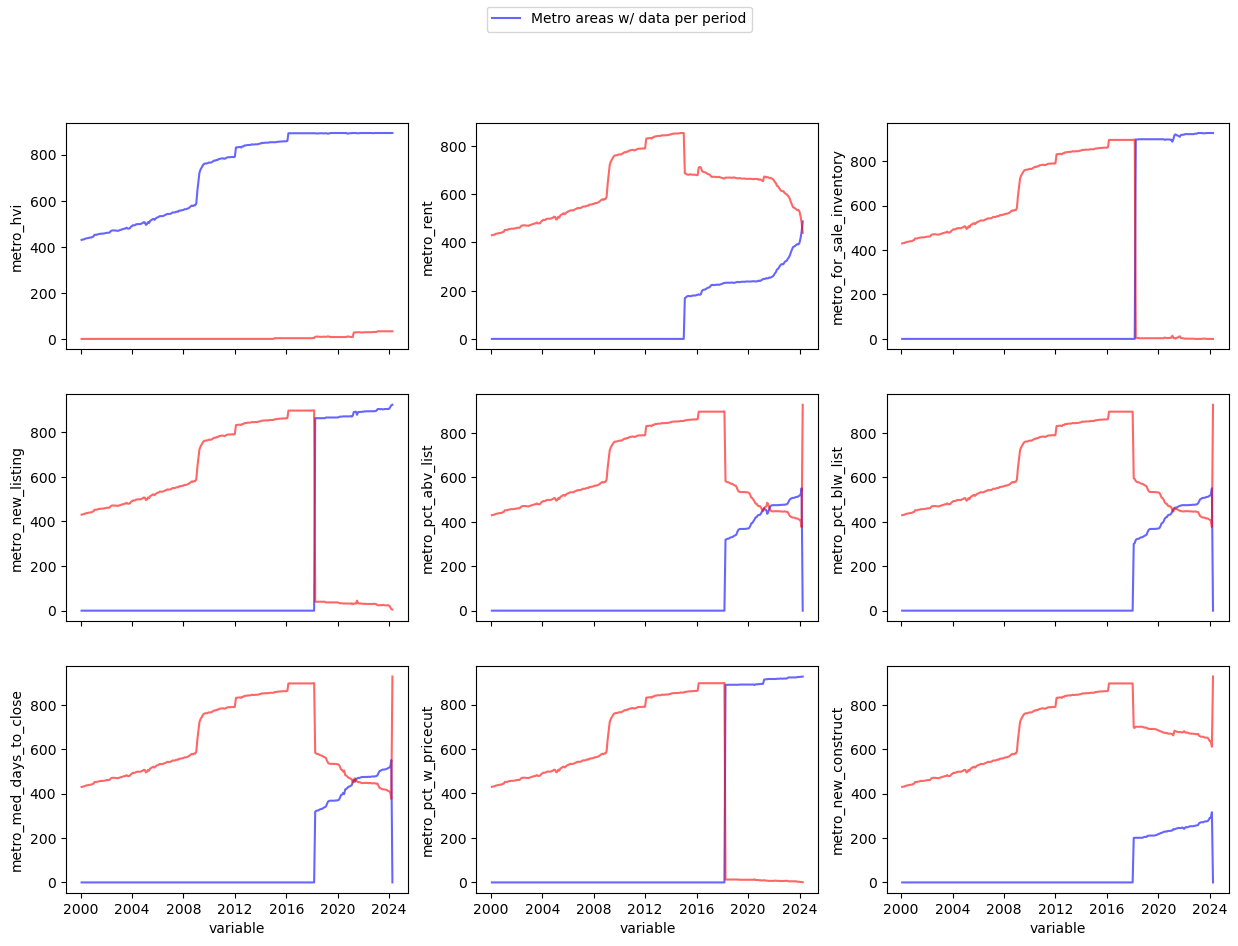

In [26]:
val_count = zillow_metro_df_metrics.groupby('variable').count()
na_count = zillow_metro_df_metrics.groupby('variable').apply(lambda x: x.isnull().sum())

fig, ax = plt.subplots(3, 3, figsize=(15, 10), sharex=True)

for i, metric in enumerate(zillow_metro_urls):

    ax_loc = ax[(i // 3) % 3, i % 3]
    
    sns.lineplot(data=val_count, x=val_count.index, y=metric, ax=ax_loc, color='blue', alpha=.6)
    sns.lineplot(data=na_count, x=na_count.index, y=metric, ax=ax_loc, color='red', alpha=.6)

#plt.legend()
plt.figlegend(['Metro areas w/ data per period'], loc='upper center', ncol=3)
plt.show()

**Import: Zip code level data**

In [27]:
#Import Zillow zipcode level data from .csv (pending access to API, wait time of ~10days for approval)

dfs = []
for metric in zillow_zip_urls:
    url = zillow_zip_urls[metric]
    df_z = pd.read_csv(url) 
    df_z['metric'] = metric
    dfs.append(df_z)

zillow_zip_df = pd.concat(dfs)

zillow_zip_df['RegionName'] = zillow_zip_df['RegionName'].astype(str).str.zfill(5)
zillow_zip_df = zillow_zip_df.drop(['SizeRank','StateName'], axis=1)

zillow_zip_df.iloc[:,:8].head()

,RegionID,RegionName,RegionType,State,City,Metro,CountyName,2000-01-31
0,91982,77494,zip,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,212277.948193
1,61148,08701,zip,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,164286.247553
2,91940,77449,zip,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,104209.669002
3,62080,11368,zip,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,305096.322513
4,91733,77084,zip,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,103506.350577


In [28]:
zillow_zip_df.iloc[:,:8].describe()

,RegionID,2000-01-31
count,26239.000000,1.277200e+04
mean,80494.258051,1.506731e+05
std,28265.649406,1.144523e+05
min,58196.000000,3.265915e+03
25%,68892.500000,8.274948e+04
50%,78831.000000,1.221252e+05
75%,88639.000000,1.815361e+05
max,808739.000000,2.100229e+06


In [29]:
zillow_zip_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26239 entries, 0 to 26238
Data columns (total 299 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    RegionID    26239 non-null  int64  
 1    RegionName  26239 non-null  object 
 2    RegionType  26239 non-null  object 
 3    State       26239 non-null  object 
 4    City        25157 non-null  object 
 5    Metro       20545 non-null  object 
 6    CountyName  26239 non-null  object 
 7    2000-01-31  12772 non-null  float64
 8    2000-02-29  12835 non-null  float64
 9    2000-03-31  12850 non-null  float64
 10   2000-04-30  12869 non-null  float64
 11   2000-05-31  12934 non-null  float64
 12   2000-06-30  12947 non-null  float64
 13   2000-07-31  12963 non-null  float64
 14   2000-08-31  12988 non-null  float64
 15   2000-09-30  13002 non-null  float64
 16   2000-10-31  13015 non-null  float64
 17   2000-11-30  13037 non-null  float64
 18   2000-12-31  13052 non-null  float64
 19   20

In [30]:
#Reshape Zillow data from wide to long

zillow_zip_df_long = pd.melt(zillow_zip_df, id_vars=['RegionID','RegionName','RegionType','State','City','Metro','CountyName','metric'])
zillow_zip_df_long["variable"] = pd.to_datetime(zillow_zip_df_long["variable"])
zillow_zip_df_long = zillow_zip_df_long.sort_values(["RegionID","variable"])

zillow_zip_df_long

,RegionID,RegionName,RegionType,State,City,Metro,CountyName,metric,variable,value
7343,58196,01001,zip,MA,Agawam,"Springfield, MA",Hampden County,zip_hvi,2000-01-31,130168.247170
33582,58196,01001,zip,MA,Agawam,"Springfield, MA",Hampden County,zip_hvi,2000-02-29,130022.452035
59821,58196,01001,zip,MA,Agawam,"Springfield, MA",Hampden County,zip_hvi,2000-03-31,130026.165192
86060,58196,01001,zip,MA,Agawam,"Springfield, MA",Hampden County,zip_hvi,2000-04-30,130149.281060
112299,58196,01001,zip,MA,Agawam,"Springfield, MA",Hampden County,zip_hvi,2000-05-31,130921.723283
...,...,...,...,...,...,...,...,...,...,...
7517242,808739,87547,zip,NM,Los Alamos,"Los Alamos, NM",Los Alamos County,zip_hvi,2023-11-30,538209.772496
7543481,808739,87547,zip,NM,Los Alamos,"Los Alamos, NM",Los Alamos County,zip_hvi,2023-12-31,544062.771549
7569720,808739,87547,zip,NM,Los Alamos,"Los Alamos, NM",Los Alamos County,zip_hvi,2024-01-31,549479.980235
7595959,808739,87547,zip,NM,Los Alamos,"Los Alamos, NM",Los Alamos County,zip_hvi,2024-02-29,555435.078898


In [31]:
zillow_zip_df_long.describe()

,RegionID,variable,value
count,7.635549e+06,7635549,5.691155e+06
mean,8.049426e+04,2012-02-29 13:16:42.061856,2.411975e+05
min,5.819600e+04,2000-01-31 00:00:00,3.230270e+03
25%,6.889200e+04,2006-01-31 00:00:00,1.139956e+05
50%,7.883100e+04,2012-02-29 00:00:00,1.718879e+05
75%,8.864000e+04,2018-03-31 00:00:00,2.780923e+05
max,8.087390e+05,2024-03-31 00:00:00,1.253848e+07
std,2.826511e+04,NaN,2.512985e+05


In [32]:
zillow_zip_df_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7635549 entries, 7343 to 7622198
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   RegionName  object        
 2   RegionType  object        
 3   State       object        
 4   City        object        
 5   Metro       object        
 6   CountyName  object        
 7   metric      object        
 8   variable    datetime64[ns]
 9   value       float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 640.8+ MB


In [33]:
counts = zillow_zip_df_long.groupby('RegionName')['RegionID'].nunique()
print(counts.sort_values(ascending=False))

RegionName
01001    1
61937    1
62002    1
62001    1
61957    1
        ..
32763    1
32759    1
32757    1
32754    1
99929    1
Name: RegionID, Length: 26239, dtype: int64


In [34]:
#Reshape Zillow data from long to wide for metrics
zillow_zip_df_metrics = zillow_zip_df_long.pivot_table(
    index=['RegionName','RegionType','State','City','Metro','CountyName','variable'],
    columns='metric',
    values='value'
)
zillow_zip_df_metrics = zillow_zip_df_metrics.reset_index()
zillow_zip_df_metrics.sort_values(by='variable',inplace=True)
zillow_zip_df_metrics = zillow_zip_df_metrics.set_index('variable')

zillow_zip_df_metrics

metric,RegionName,RegionType,State,City,Metro,CountyName,zip_hvi
variable,,,,,,,
2000-01-31,01001,zip,MA,Agawam,"Springfield, MA",Hampden County,1.301682e+05
2000-01-31,07403,zip,NJ,Bloomingdale,"New York-Newark-Jersey City, NY-NJ-PA",Passaic County,1.701448e+05
2000-01-31,73537,zip,OK,Olustee,"Altus, OK",Jackson County,3.045105e+04
2000-01-31,38222,zip,TN,Buchanan,"Paris, TN",Henry County,8.971861e+04
2000-01-31,20851,zip,MD,Rockville,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,1.630317e+05
...,...,...,...,...,...,...,...
2024-03-31,56335,zip,MN,Greenwald,"St. Cloud, MN",Stearns County,1.871708e+05
2024-03-31,99111,zip,WA,Colfax,"Pullman, WA",Whitman County,2.978312e+05
2024-03-31,08008,zip,NJ,Long Beach Township,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,1.670388e+06


In [35]:
zillow_zip_df_metrics.describe()

metric,zip_hvi
count,4.724374e+06
mean,2.586848e+05
std,2.657329e+05
min,3.230270e+03
25%,1.219287e+05
50%,1.850450e+05
75%,3.007655e+05
max,1.253848e+07


In [36]:
zillow_zip_df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4724374 entries, 2000-01-31 to 2024-03-31
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionName  object 
 1   RegionType  object 
 2   State       object 
 3   City        object 
 4   Metro       object 
 5   CountyName  object 
 6   zip_hvi     float64
dtypes: float64(1), object(6)
memory usage: 288.4+ MB


<Axes: >

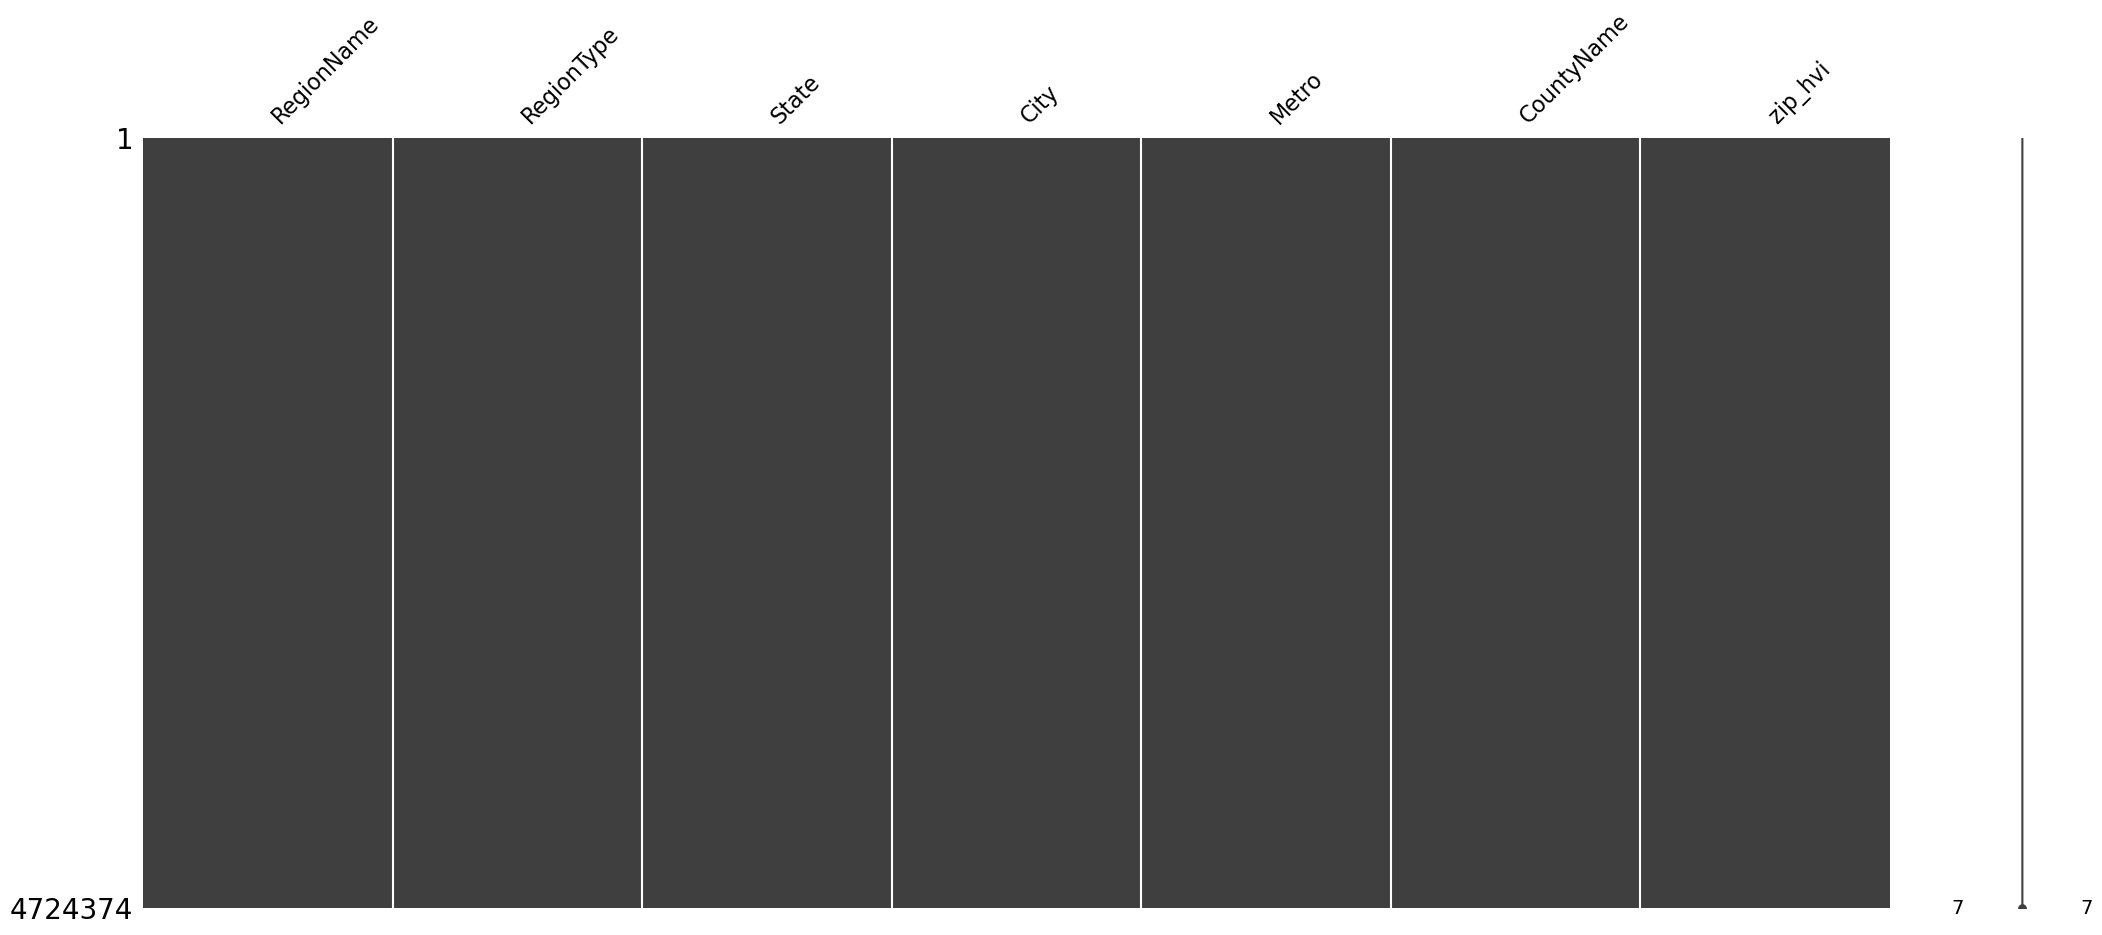

In [37]:
msno.matrix(zillow_zip_df_metrics)

*****
**Profile Datasets**
*****

In [38]:
zillow_zip_df_metrics

metric,RegionName,RegionType,State,City,Metro,CountyName,zip_hvi
variable,,,,,,,
2000-01-31,01001,zip,MA,Agawam,"Springfield, MA",Hampden County,1.301682e+05
2000-01-31,07403,zip,NJ,Bloomingdale,"New York-Newark-Jersey City, NY-NJ-PA",Passaic County,1.701448e+05
2000-01-31,73537,zip,OK,Olustee,"Altus, OK",Jackson County,3.045105e+04
2000-01-31,38222,zip,TN,Buchanan,"Paris, TN",Henry County,8.971861e+04
2000-01-31,20851,zip,MD,Rockville,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,1.630317e+05
...,...,...,...,...,...,...,...
2024-03-31,56335,zip,MN,Greenwald,"St. Cloud, MN",Stearns County,1.871708e+05
2024-03-31,99111,zip,WA,Colfax,"Pullman, WA",Whitman County,2.978312e+05
2024-03-31,08008,zip,NJ,Long Beach Township,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,1.670388e+06


In [39]:
zillow_metro_df_metrics

metric,RegionID,RegionName,RegionType,StateName,metro_for_sale_inventory,metro_hvi,metro_med_days_to_close,metro_new_construct,metro_new_listing,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut,metro_rent
variable,,,,,,,,,,,,,
2000-01-31,394570,"Enid, OK",msa,OK,NaN,69769.242087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,394632,"Glasgow, KY",msa,KY,NaN,59622.707074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,394484,"Colorado Springs, CO",msa,CO,NaN,165157.510870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,394501,"Corning, NY",msa,NY,NaN,77345.158353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,395047,"Saginaw, MI",msa,MI,NaN,78918.912748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,394957,"Palm Bay, FL",msa,FL,3158.0,365323.030303,NaN,NaN,1172.0,NaN,NaN,0.316012,2251.156492
2024-03-31,394369,"Bay City, MI",msa,MI,209.0,160261.764901,NaN,NaN,83.0,NaN,NaN,0.199739,1000.000000
2024-03-31,394700,"Huron, SD",msa,SD,52.0,189374.829905,NaN,NaN,15.0,NaN,NaN,0.102366,NaN


In [40]:
#Confirm all dates are end of month
list(zillow_metro_df_metrics.index.unique())

[Timestamp('2000-01-31 00:00:00'),
 Timestamp('2000-02-29 00:00:00'),
 Timestamp('2000-03-31 00:00:00'),
 Timestamp('2000-04-30 00:00:00'),
 Timestamp('2000-05-31 00:00:00'),
 Timestamp('2000-06-30 00:00:00'),
 Timestamp('2000-07-31 00:00:00'),
 Timestamp('2000-08-31 00:00:00'),
 Timestamp('2000-09-30 00:00:00'),
 Timestamp('2000-10-31 00:00:00'),
 Timestamp('2000-11-30 00:00:00'),
 Timestamp('2000-12-31 00:00:00'),
 Timestamp('2001-01-31 00:00:00'),
 Timestamp('2001-02-28 00:00:00'),
 Timestamp('2001-03-31 00:00:00'),
 Timestamp('2001-04-30 00:00:00'),
 Timestamp('2001-05-31 00:00:00'),
 Timestamp('2001-06-30 00:00:00'),
 Timestamp('2001-07-31 00:00:00'),
 Timestamp('2001-08-31 00:00:00'),
 Timestamp('2001-09-30 00:00:00'),
 Timestamp('2001-10-31 00:00:00'),
 Timestamp('2001-11-30 00:00:00'),
 Timestamp('2001-12-31 00:00:00'),
 Timestamp('2002-01-31 00:00:00'),
 Timestamp('2002-02-28 00:00:00'),
 Timestamp('2002-03-31 00:00:00'),
 Timestamp('2002-04-30 00:00:00'),
 Timestamp('2002-05-

In [41]:
zillow_state_df_metrics = zillow_state_df_long.drop(columns='metric')
zillow_state_df_metrics

,State,RegionName,RegionType,state_HVI
variable,,,,
2000-01-31,AK,Alaska,state,134050.488951
2000-01-31,AL,Alabama,state,98522.947066
2000-01-31,AR,Arkansas,state,86316.317600
2000-01-31,AZ,Arizona,state,138432.405665
2000-01-31,CA,California,state,198015.154744
...,...,...,...,...
2024-03-31,VT,Vermont,state,384416.422941
2024-03-31,WA,Washington,state,605769.588316
2024-03-31,WI,Wisconsin,state,298246.778571


In [42]:
#last period with no data
review = zillow_state_df_metrics[zillow_state_df_metrics['state_HVI'].isnull()]
print(review.index.max())

2019-03-31 00:00:00


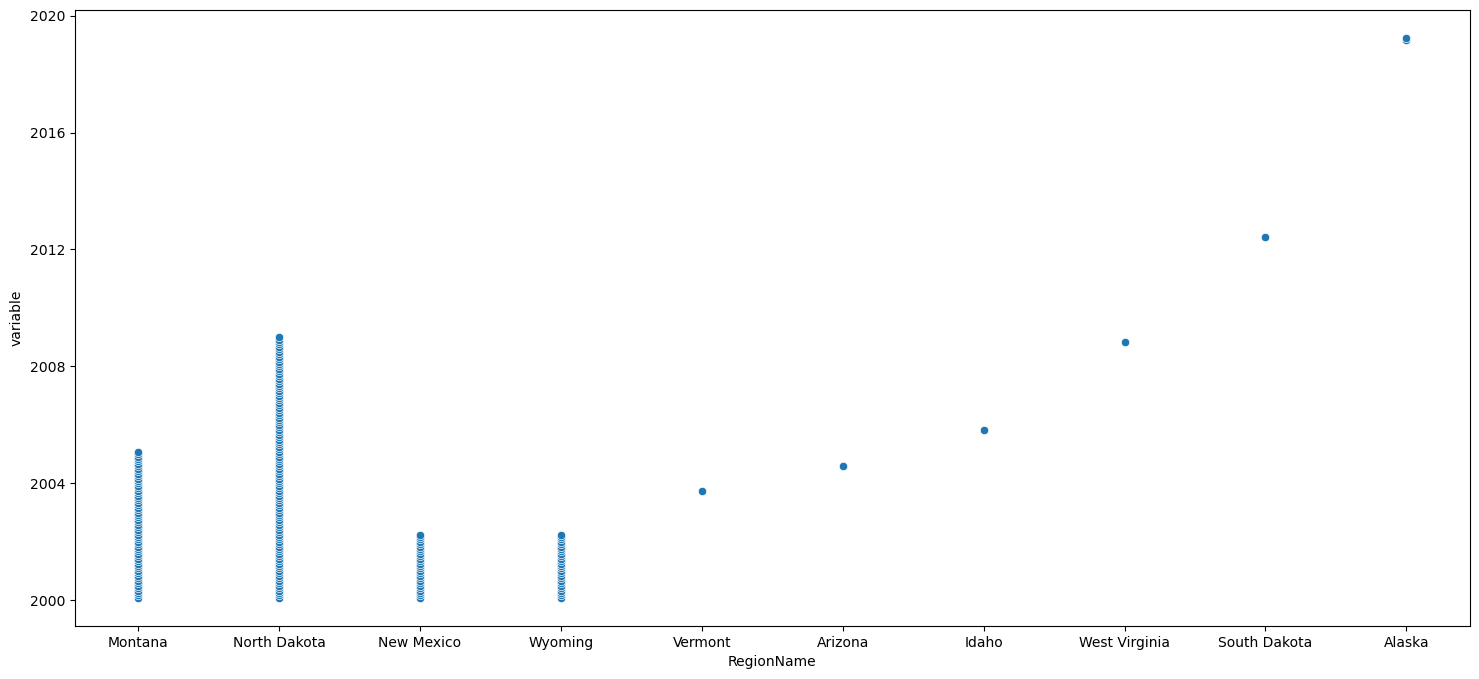

In [43]:
#sporadic missing values identified. Will keep these records.
plt.figure(figsize=(18,8))
sns.scatterplot(x="RegionName", y="variable", data=review)
plt.show()

In [44]:
#Cache premerged datasets
zillow_zip_df_metrics.to_pickle('../Data/zillow_zip_cache.pkl')
zillow_metro_df_metrics.to_pickle('../Data/zillow_metro_cache.pkl')
zillow_state_df_metrics.to_pickle('../Data/zillow_state_cache.pkl')

**Merge datasets**

**Merge state data to metro**

In [45]:
#Add state metrics to metro dataset
zillow_metro_state = pd.merge(zillow_metro_df_metrics,zillow_state_df_metrics,left_on=['StateName','variable'],right_on=['State','variable'],how='left')

In [46]:
print("original metro record count:",len(zillow_metro_df_metrics))
print("original state record count:",len(zillow_state_df_metrics))
print("Zip record still same after left join?:",len(zillow_metro_df_metrics) == len(zillow_metro_state))
zillow_metro_state.head(5)

original metro record count: 212457
original state record count: 14841
Zip record still same after left join?: True


,RegionID,RegionName_x,RegionType_x,StateName,metro_for_sale_inventory,metro_hvi,metro_med_days_to_close,metro_new_construct,metro_new_listing,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut,metro_rent,State,RegionName_y,RegionType_y,state_HVI
variable,,,,,,,,,,,,,,,,,
2000-01-31,394570,"Enid, OK",msa,OK,NaN,69769.242087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK,Oklahoma,state,82020.202343
2000-01-31,394632,"Glasgow, KY",msa,KY,NaN,59622.707074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,Kentucky,state,83882.513982
2000-01-31,394484,"Colorado Springs, CO",msa,CO,NaN,165157.510870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO,Colorado,state,182333.506030
2000-01-31,394501,"Corning, NY",msa,NY,NaN,77345.158353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,New York,state,137303.237648
2000-01-31,395047,"Saginaw, MI",msa,MI,NaN,78918.912748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MI,Michigan,state,114448.538962


In [47]:
zillow_metro_state_clean = zillow_metro_state.rename(columns={
    "RegionID":"metro_ID",
    "RegionName_x":"metro_name",
    "RegionType_x":"metro_type",
    "StateName":"state_ID",
    "RegionName_y":"state_name",
    "RegionType_y":"state_type",
})

zillow_metro_state_clean.sort_values(by=['variable','state_ID','metro_ID'], inplace=True)
zillow_metro_state_clean

,metro_ID,metro_name,metro_type,state_ID,metro_for_sale_inventory,metro_hvi,metro_med_days_to_close,metro_new_construct,metro_new_listing,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut,metro_rent,State,state_name,state_type,state_HVI
variable,,,,,,,,,,,,,,,,,
2000-01-31,394327,"Anchorage, AK",msa,AK,NaN,1.381946e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,Alaska,state,134050.488951
2000-01-31,394351,"Auburn, AL",msa,AL,NaN,1.333693e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,Alabama,state,98522.947066
2000-01-31,394388,"Birmingham, AL",msa,AL,NaN,1.130073e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,Alabama,state,98522.947066
2000-01-31,394519,"Daphne, AL",msa,AL,NaN,1.197302e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,Alabama,state,98522.947066
2000-01-31,394870,"Mobile, AL",msa,AL,NaN,8.911453e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,Alabama,state,98522.947066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,394713,"Jackson, WY",msa,WY,226.0,1.611017e+06,NaN,NaN,56.0,NaN,NaN,0.076230,NaN,WY,Wyoming,state,340040.008209
2024-03-31,394771,"Laramie, WY",msa,WY,60.0,3.570086e+05,NaN,NaN,23.0,NaN,NaN,0.093210,1766.666667,WY,Wyoming,state,340040.008209
2024-03-31,395026,"Riverton, WY",msa,WY,170.0,3.102027e+05,NaN,NaN,32.0,NaN,NaN,0.083839,1225.000000,WY,Wyoming,state,340040.008209


**Merge state and metro data to zip**

In [48]:
#Add state metrics to zip dataset
zillow_zip_state = pd.merge(zillow_zip_df_metrics,zillow_state_df_metrics,on=['State','variable'],how='left')

In [49]:
print("original zip record count:",len(zillow_zip_df_metrics))
print("original state record count:",len(zillow_state_df_metrics))
print("Zip record still same after left join?:",len(zillow_zip_df_metrics) == len(zillow_zip_state))
zillow_zip_state

original zip record count: 4724374
original state record count: 14841
Zip record still same after left join?: True


,RegionName_x,RegionType_x,State,City,Metro,CountyName,zip_hvi,RegionName_y,RegionType_y,state_HVI
variable,,,,,,,,,,
2000-01-31,01001,zip,MA,Agawam,"Springfield, MA",Hampden County,1.301682e+05,Massachusetts,state,202163.646319
2000-01-31,07403,zip,NJ,Bloomingdale,"New York-Newark-Jersey City, NY-NJ-PA",Passaic County,1.701448e+05,New Jersey,state,173971.032770
2000-01-31,73537,zip,OK,Olustee,"Altus, OK",Jackson County,3.045105e+04,Oklahoma,state,82020.202343
2000-01-31,38222,zip,TN,Buchanan,"Paris, TN",Henry County,8.971861e+04,Tennessee,state,109621.767681
2000-01-31,20851,zip,MD,Rockville,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,1.630317e+05,Maryland,state,155660.627018
...,...,...,...,...,...,...,...,...,...,...
2024-03-31,56335,zip,MN,Greenwald,"St. Cloud, MN",Stearns County,1.871708e+05,Minnesota,state,337425.165779
2024-03-31,99111,zip,WA,Colfax,"Pullman, WA",Whitman County,2.978312e+05,Washington,state,605769.588316
2024-03-31,08008,zip,NJ,Long Beach Township,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,1.670388e+06,New Jersey,state,529435.945763


In [50]:
zillow_zip_state_clean = zillow_zip_state.rename(columns={
    "RegionName_x":"zip_ID",
    "RegionType_x":"zip_type",
    "State":"state_ID",
    "RegionName_y":"state_name",
    "RegionType_y":"state_type",
})

zillow_zip_state_clean.sort_values(by=['variable','state_ID','zip_ID'], inplace=True)
zillow_zip_state_clean

,zip_ID,zip_type,state_ID,City,Metro,CountyName,zip_hvi,state_name,state_type,state_HVI
variable,,,,,,,,,,
2000-01-31,99501,zip,AK,Anchorage,"Anchorage, AK",Anchorage Borough,1.431346e+05,Alaska,state,134050.488951
2000-01-31,99502,zip,AK,Anchorage,"Anchorage, AK",Anchorage Borough,1.466271e+05,Alaska,state,134050.488951
2000-01-31,99503,zip,AK,Anchorage,"Anchorage, AK",Anchorage Borough,1.170980e+05,Alaska,state,134050.488951
2000-01-31,99504,zip,AK,Anchorage,"Anchorage, AK",Anchorage Borough,1.294101e+05,Alaska,state,134050.488951
2000-01-31,99507,zip,AK,Anchorage,"Anchorage, AK",Anchorage Borough,1.487655e+05,Alaska,state,134050.488951
...,...,...,...,...,...,...,...,...,...,...
2024-03-31,82945,zip,WY,Superior,"Rock Springs, WY",Sweetwater County,7.519184e+04,Wyoming,state,340040.008209
2024-03-31,83001,zip,WY,Jackson,"Jackson, WY-ID",Teton County,2.412911e+06,Wyoming,state,340040.008209
2024-03-31,83013,zip,WY,Moran,"Jackson, WY-ID",Teton County,1.590548e+06,Wyoming,state,340040.008209


<Axes: >

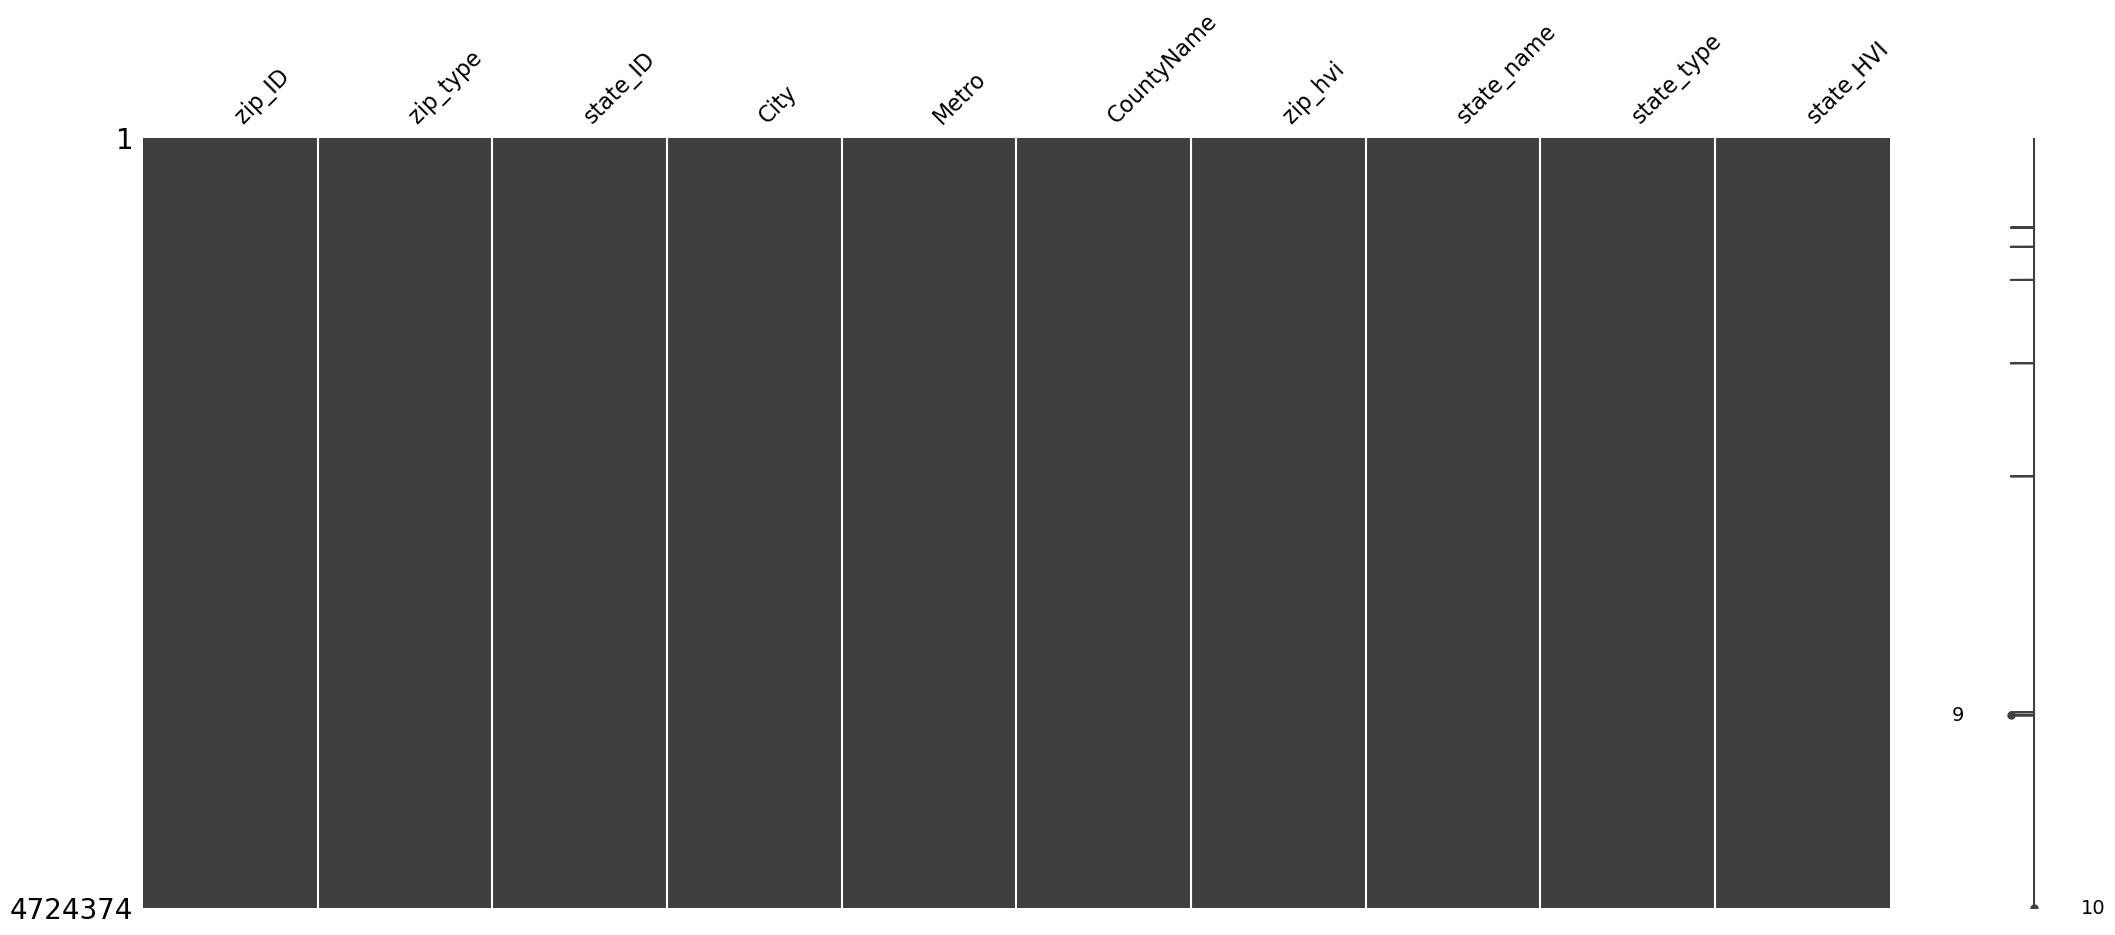

In [51]:
#review missing values
msno.matrix(zillow_zip_state_clean)

In [52]:
#Add combined state/zip metrics to metro dataset
zillow_metro_state_zip = pd.merge(zillow_zip_state_clean,zillow_metro_df_metrics,left_on=['Metro','variable'],right_on=['RegionName','variable'],how='left')

In [53]:
print("original zip record count:",len(zillow_zip_df_metrics))
print("original metro record count:",len(zillow_metro_df_metrics))
print("Zip record still same after left join?:",len(zillow_zip_df_metrics) == len(zillow_metro_state_zip))
zillow_metro_state_zip

original zip record count: 4724374
original metro record count: 212457
Zip record still same after left join?: True


,zip_ID,zip_type,state_ID,City,Metro,CountyName,zip_hvi,state_name,state_type,state_HVI,...,StateName,metro_for_sale_inventory,metro_hvi,metro_med_days_to_close,metro_new_construct,metro_new_listing,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut,metro_rent
variable,,,,,,,,,,,,,,,,,,,,,
2000-01-31,99501,zip,AK,Anchorage,"Anchorage, AK",Anchorage Borough,1.431346e+05,Alaska,state,134050.488951,...,AK,NaN,138194.589336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,99502,zip,AK,Anchorage,"Anchorage, AK",Anchorage Borough,1.466271e+05,Alaska,state,134050.488951,...,AK,NaN,138194.589336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,99503,zip,AK,Anchorage,"Anchorage, AK",Anchorage Borough,1.170980e+05,Alaska,state,134050.488951,...,AK,NaN,138194.589336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,99504,zip,AK,Anchorage,"Anchorage, AK",Anchorage Borough,1.294101e+05,Alaska,state,134050.488951,...,AK,NaN,138194.589336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,99507,zip,AK,Anchorage,"Anchorage, AK",Anchorage Borough,1.487655e+05,Alaska,state,134050.488951,...,AK,NaN,138194.589336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,82945,zip,WY,Superior,"Rock Springs, WY",Sweetwater County,7.519184e+04,Wyoming,state,340040.008209,...,WY,104.0,271442.557255,NaN,NaN,29.0,NaN,NaN,0.14733,NaN
2024-03-31,83001,zip,WY,Jackson,"Jackson, WY-ID",Teton County,2.412911e+06,Wyoming,state,340040.008209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-31,83013,zip,WY,Moran,"Jackson, WY-ID",Teton County,1.590548e+06,Wyoming,state,340040.008209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
zillow_metro_state_zip_temp = zillow_metro_state_zip.drop(columns=['StateName', 'RegionName'])
zillow_metro_state_zip_clean = zillow_metro_state_zip_temp.rename(columns={
    "Metro":"metro_name",
    "RegionID":"metro_ID",
    "RegionType":"metro_type"
})
zillow_metro_state_zip_clean.sort_values(by=['variable','state_ID','metro_name','zip_ID'], inplace=True)
zillow_metro_state_zip_clean = zillow_metro_state_zip_clean[[
    'zip_ID', 'zip_type', 'state_ID', 'state_name', 'state_type', 'metro_ID', 'metro_name', 'metro_type', 
    'zip_hvi', 'state_HVI', 'metro_hvi',
    'metro_new_construct', 'metro_new_listing', 'metro_for_sale_inventory', 'metro_rent', 
    'metro_med_days_to_close', 'metro_pct_abv_list', 'metro_pct_blw_list', 'metro_pct_w_pricecut'
]]
zillow_metro_state_zip_clean = zillow_metro_state_zip_clean.set_index([zillow_metro_state_zip_clean.index,'zip_ID'])
zillow_metro_state_zip_clean

zip_type state_ID state_name state_type metro_ID  \
variable   zip_ID                                                    
2000-01-31 99501       zip       AK     Alaska      state   394327   
           99502       zip       AK     Alaska      state   394327   
           99503       zip       AK     Alaska      state   394327   
           99504       zip       AK     Alaska      state   394327   
           99507       zip       AK     Alaska      state   394327   
...                    ...      ...        ...        ...      ...   
2024-03-31 82835       zip       WY    Wyoming      state   395093   
           82836       zip       WY    Wyoming      state   395093   
           82838       zip       WY    Wyoming      state   395093   
           82839       zip       WY    Wyoming      state   395093   
           82842       zip       WY    Wyoming      state   395093   

                      metro_name metro_type        zip_hvi      state_HVI  \
variable   zip_ID                                                           
2000-01-31 99501   Anchorage, AK        msa  143134.618852  134050.488951   
           99502   Anchorage, AK        msa  146627.140466  134050.488951   
           99503   Anchorage, AK        msa  117098.018759  134050.488951   
           99504   Anchorage, AK        msa  129410.107549  134050.488951   
           99507   Anchorage, AK        msa  148765.461401  134050.488951   
...                          ...        ...            ...            ...   
2024-03-31 82835    Sheridan, WY        msa  523850.903141  340040.008209   
           82836    Sheridan, WY        msa  436851.339751  340040.008209   
           82838    Sheridan, WY        msa  536706.669275  340040.008209   
           82839    Sheridan, WY        msa  397047.198518  340040.008209   
           82842    Sheridan, WY        msa  441864.497527  340040.008209   

                       metro_hvi  metro_new_construct  metro_new_listing  \
variable   zip_ID                                                          
2000-01-31 99501   138194.589336                  NaN                NaN   
           99502   138194.589336                  NaN                NaN   
           99503   138194.589336                  NaN                NaN   
           99504   138194.589336                  NaN                NaN   
           99507   138194.589336                  NaN                NaN   
...                          ...                  ...                ...   
2024-03-31 82835   416612.091495                  NaN               32.0   
           82836   416612.091495                  NaN               32.0   
           82838   416612.091495                  NaN               32.0   
           82839   416612.091495                  NaN               32.0   
           82842   416612.091495                  NaN               32.0   

                   metro_for_sale_inventory  metro_rent  \
variable   zip_ID                                         
2000-01-31 99501                        NaN         NaN   
           99502                        NaN         NaN   
           99503                        NaN         NaN   
           99504                        NaN         NaN   
           99507                        NaN         NaN   
...                                     ...         ...   
2024-03-31 82835                      159.0         NaN   
           82836                      159.0         NaN   
           82838                      159.0         NaN   
           82839                      159.0         NaN   
           82842                      159.0         NaN   

                   metro_med_days_to_close  metro_pct_abv_list  \
variable   zip_ID                                                
2000-01-31 99501                       NaN                 NaN   
           99502                       NaN                 NaN   
           99503                       NaN                 NaN   
           99504  

In [55]:
zillow_metro_state_zip_clean.describe()

,zip_hvi,state_HVI,metro_hvi,metro_new_construct,metro_new_listing,metro_for_sale_inventory,metro_rent,metro_med_days_to_close,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut
count,4.724374e+06,4.723818e+06,1.818155e+06,221199.00000,601109.000000,605742.000000,375971.000000,363260.000000,363436.000000,371962.000000,605157.000000
mean,2.586848e+05,2.310011e+05,1.778827e+05,88.85891,431.064626,1191.566954,1419.221198,36.124710,0.307622,0.511439,0.168253
std,2.657329e+05,1.210201e+05,1.056119e+05,106.53737,632.195957,1712.787205,596.260554,7.894317,0.152080,0.157504,0.053164
min,3.230270e+03,7.318201e+04,2.782522e+04,5.00000,4.000000,4.000000,574.227766,7.000000,0.000000,0.066225,0.009804
25%,1.219287e+05,1.453574e+05,1.143743e+05,24.00000,66.000000,232.000000,1103.767803,31.000000,0.189165,0.400000,0.129866
50%,1.850450e+05,1.979919e+05,1.493954e+05,49.00000,166.000000,526.000000,1319.162295,35.000000,0.281780,0.517241,0.164359
75%,3.007655e+05,2.760956e+05,2.062996e+05,111.00000,500.000000,1329.000000,1622.007230,39.000000,0.399951,0.626866,0.202404
max,1.253848e+07,1.025691e+06,1.579034e+06,830.00000,3564.000000,11721.000000,21222.222222,78.000000,0.822222,0.969697,0.483076


In [56]:
print(zillow_metro_state_zip_clean.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4724374 entries, (Timestamp('2000-01-31 00:00:00'), '99501') to (Timestamp('2024-03-31 00:00:00'), '82842')
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   zip_type                  object 
 1   state_ID                  object 
 2   state_name                object 
 3   state_type                object 
 4   metro_ID                  object 
 5   metro_name                object 
 6   metro_type                object 
 7   zip_hvi                   float64
 8   state_HVI                 float64
 9   metro_hvi                 float64
 10  metro_new_construct       float64
 11  metro_new_listing         float64
 12  metro_for_sale_inventory  float64
 13  metro_rent                float64
 14  metro_med_days_to_close   float64
 15  metro_pct_abv_list        float64
 16  metro_pct_blw_list        float64
 17  metro_pct_w_pricecut      float64
dtypes: float64(11), object(7

In [57]:
zillow_metro_state_zip_clean.count()

zip_type                    4724374
state_ID                    4724374
state_name                  4724374
state_type                  4724374
metro_ID                    1827317
metro_name                  4724374
metro_type                  1827317
zip_hvi                     4724374
state_HVI                   4723818
metro_hvi                   1818155
metro_new_construct          221199
metro_new_listing            601109
metro_for_sale_inventory     605742
metro_rent                   375971
metro_med_days_to_close      363260
metro_pct_abv_list           363436
metro_pct_blw_list           371962
metro_pct_w_pricecut         605157
dtype: int64

<Axes: >

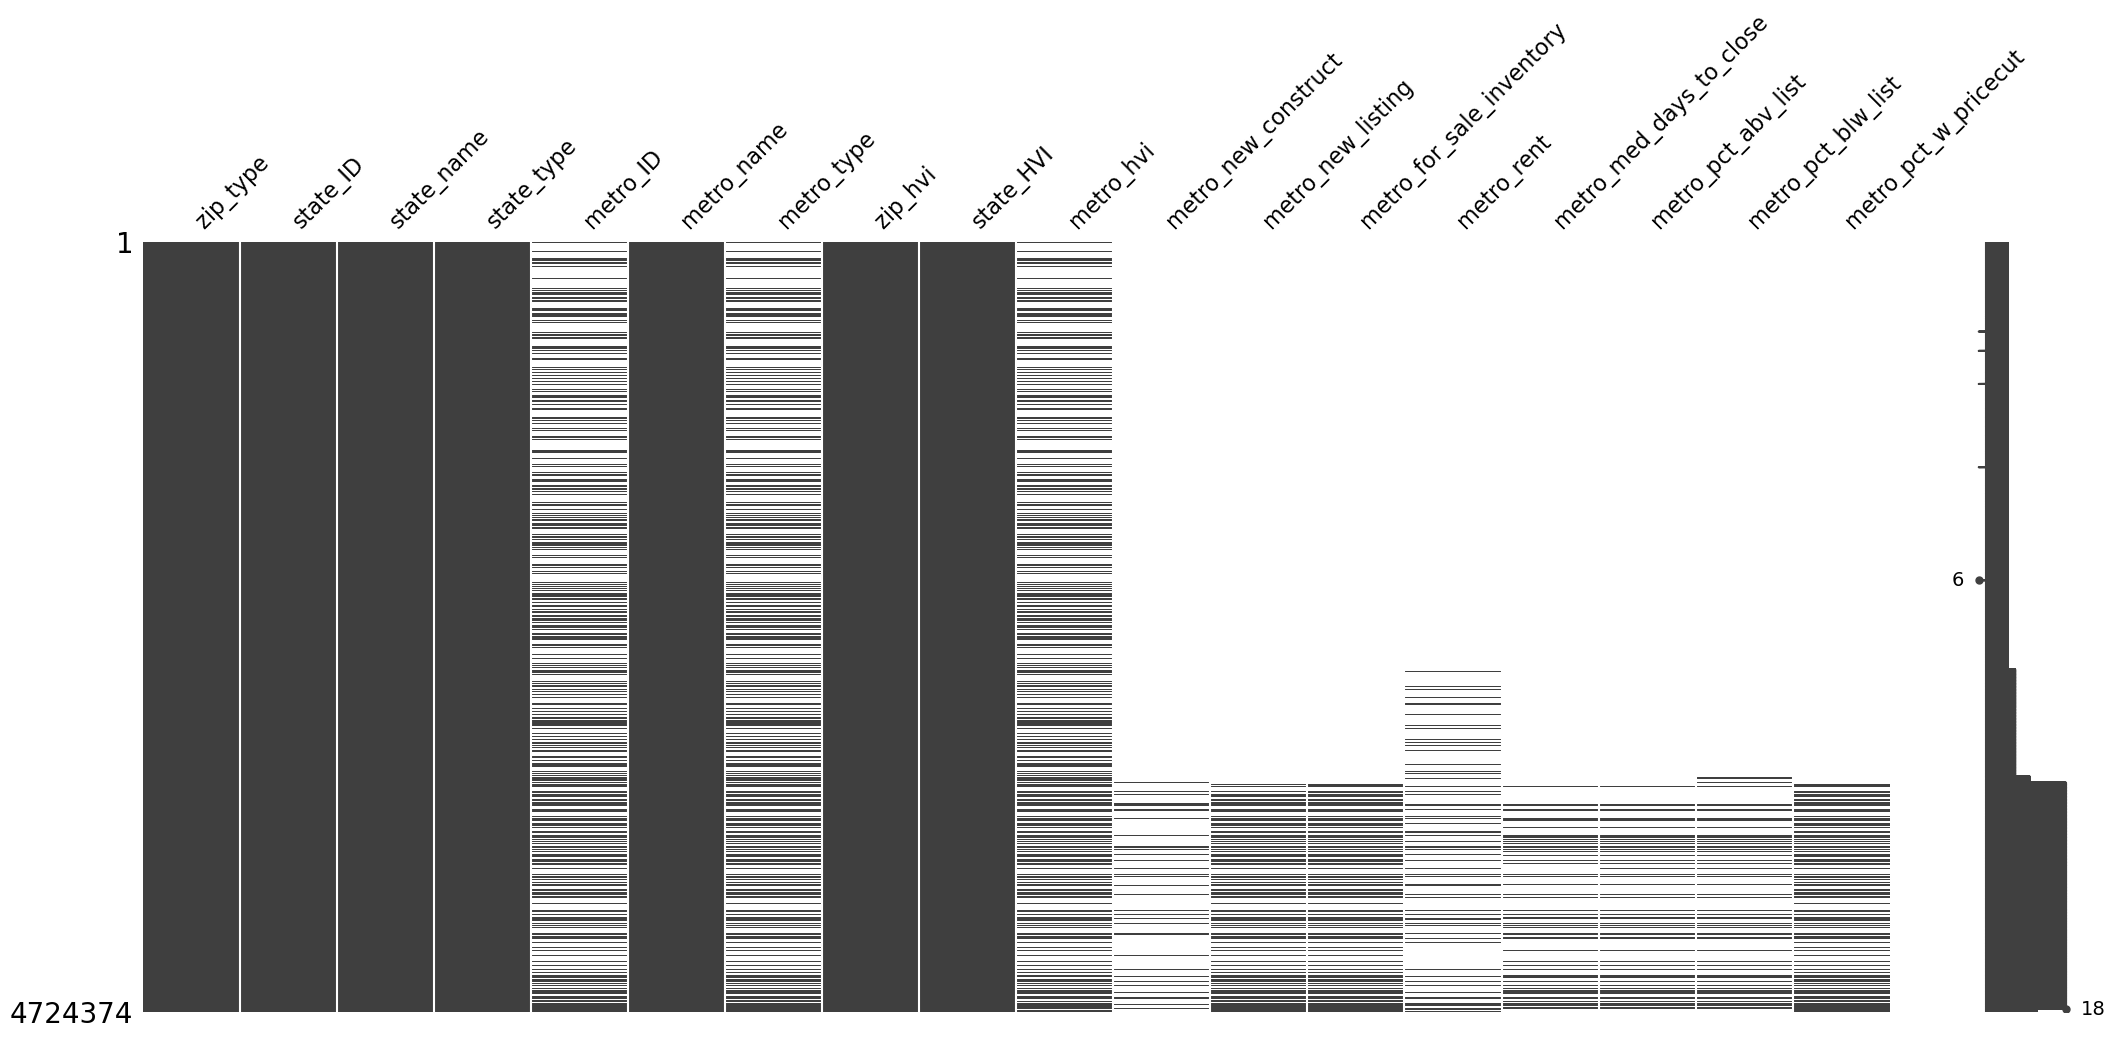

In [58]:
#review missing values
msno.matrix(zillow_metro_state_zip_clean)

In [59]:
no_metro = zillow_metro_state_zip_clean['metro_ID'].isna()
no_metro_df = pd.DataFrame(zillow_metro_state_zip_clean[no_metro])
metro_df = pd.DataFrame(zillow_metro_state_zip_clean[~no_metro])

No metro
Metro


<Axes: >

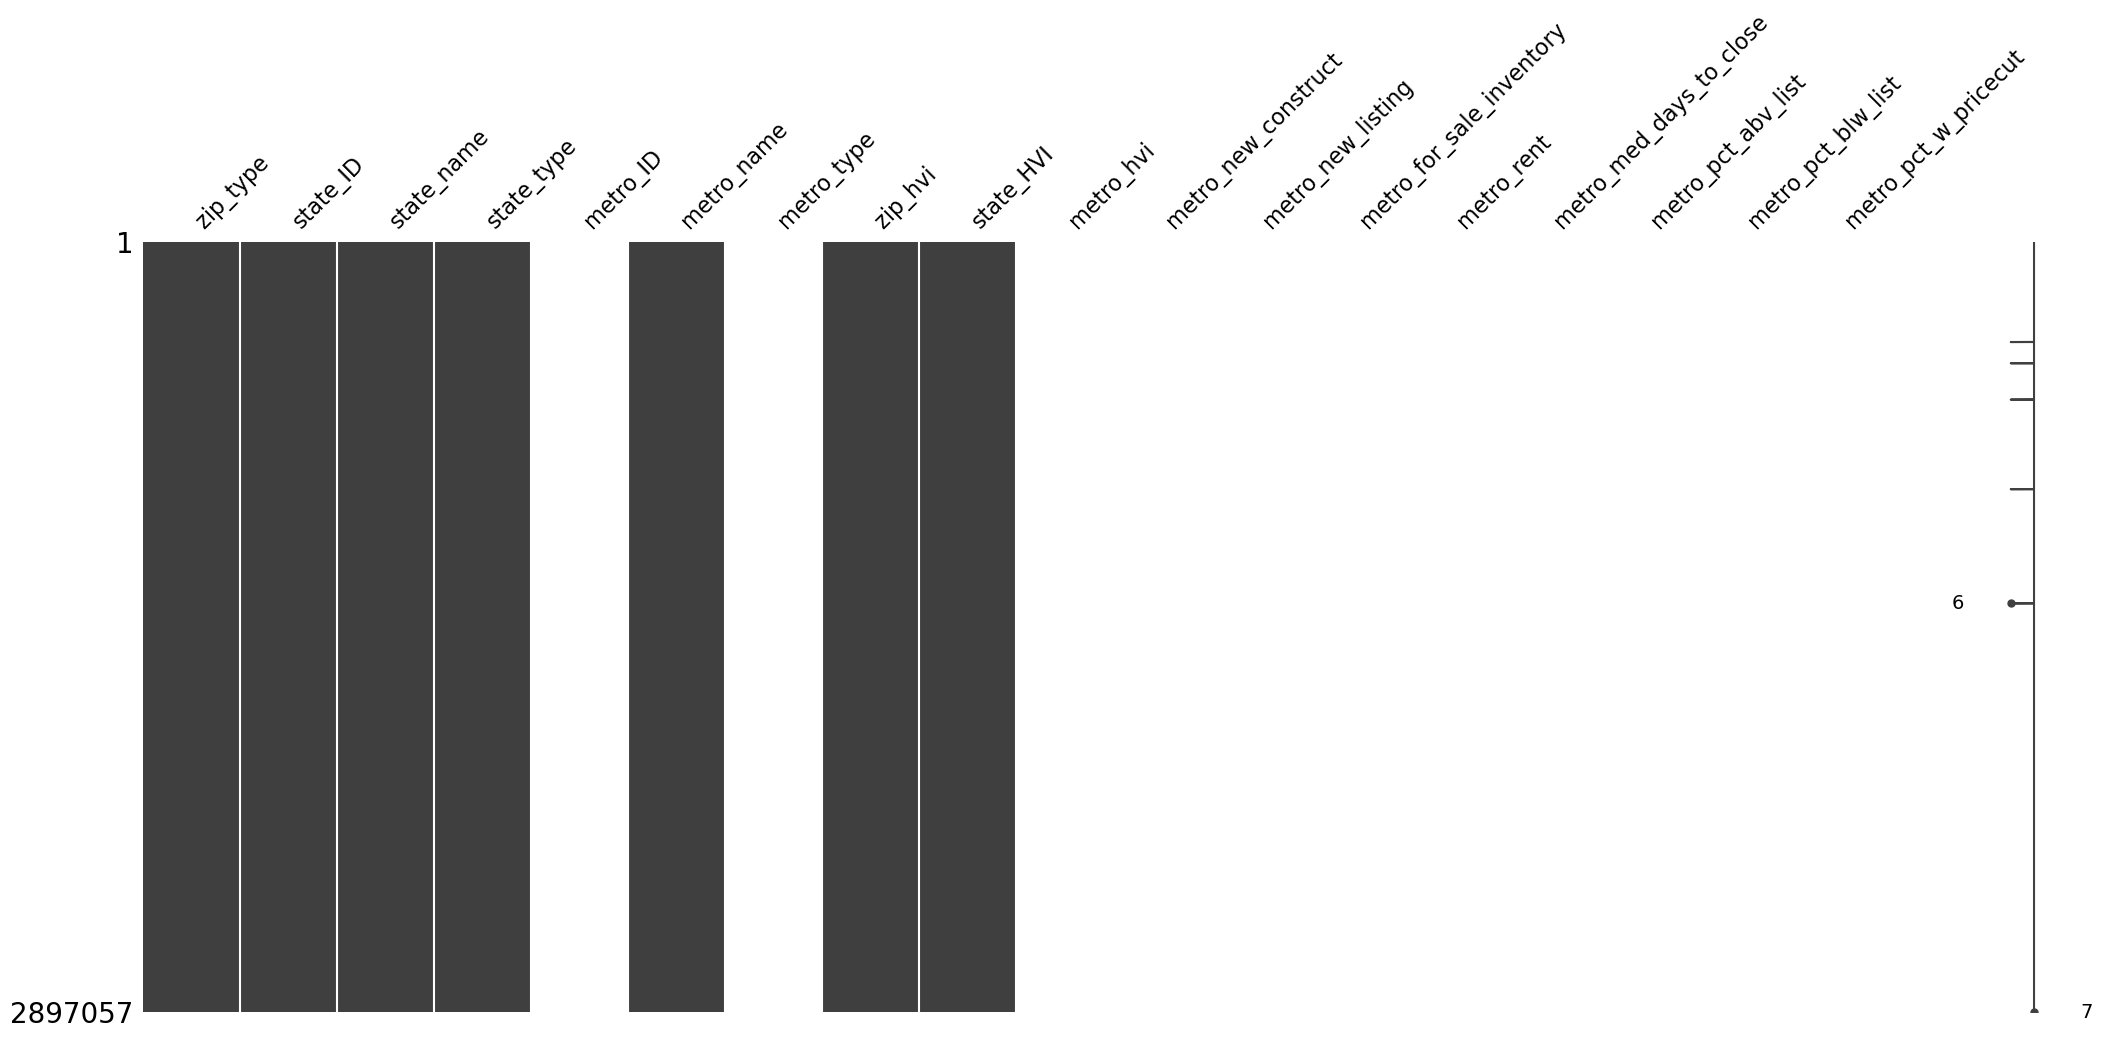

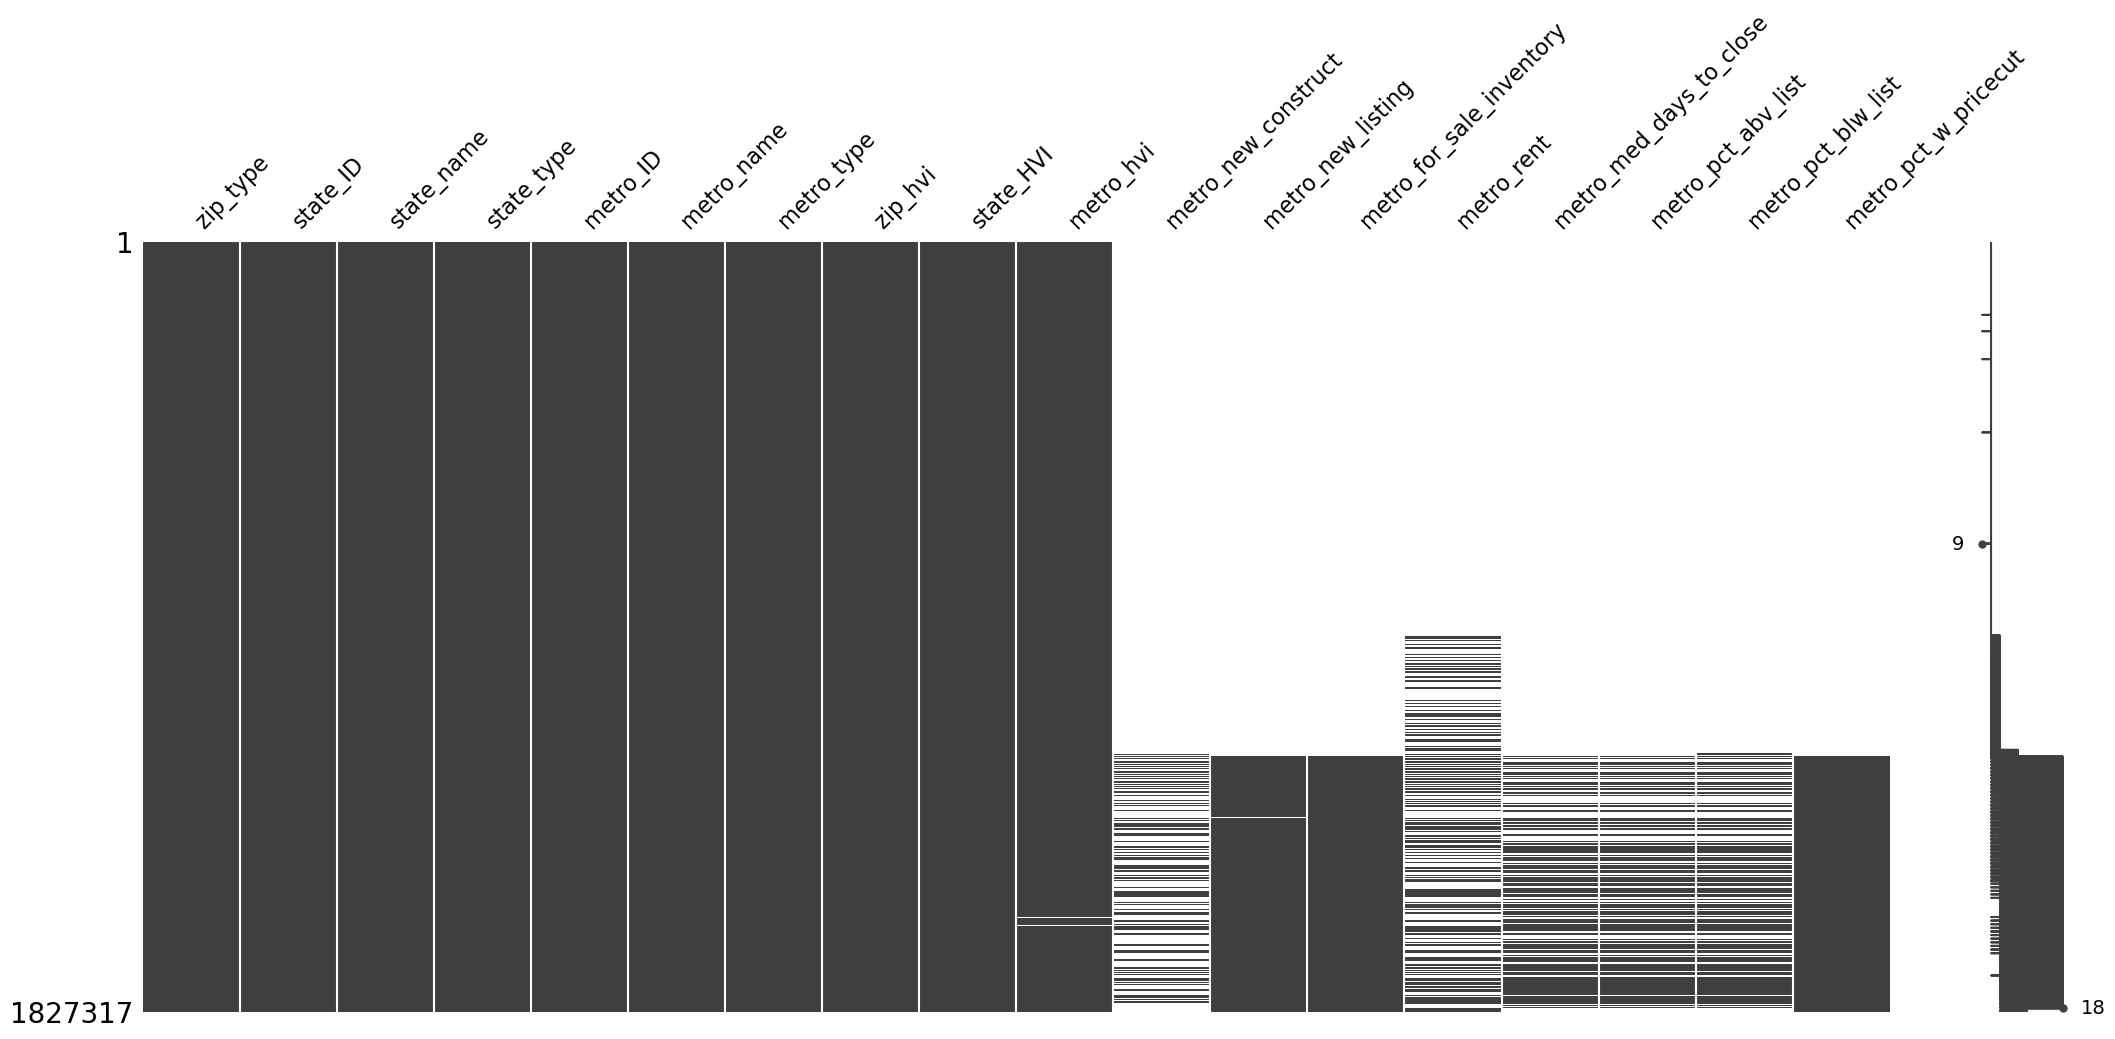

In [60]:
#review missing values seperately depending if metro data was available for merge
print("No metro")
msno.matrix(no_metro_df)

print("Metro")
msno.matrix(metro_df)

In [61]:
new_listing_null = metro_df['metro_new_listing'].isnull()
new_listing_df = metro_df[~new_listing_null]
print("New listing min: ",new_listing_df.index.get_level_values('variable').min())
print("New listing max: ",new_listing_df.index.get_level_values('variable').max())

New listing min:  2018-03-31 00:00:00
New listing max:  2024-03-31 00:00:00


Metro data available for more recent years only. Intermiten availability for most fields.
Metro_HVI is consistently available.
Metro_new_listing, metro_for_sale_inventory and metro_pct_w_pricecut appear to be most consistently available beginning March 2018.

**Review missing metro areas and apply fuzzy match where possible**

In [62]:
#Look at one zip code as an example
ATX = zillow_metro_state_zip_clean.xs('78704', level='zip_ID')
ATX.head()

,zip_type,state_ID,state_name,state_type,metro_ID,metro_name,metro_type,zip_hvi,state_HVI,metro_hvi,metro_new_construct,metro_new_listing,metro_for_sale_inventory,metro_rent,metro_med_days_to_close,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut
variable,,,,,,,,,,,,,,,,,,
2000-01-31,zip,TX,Texas,state,NaN,"Austin-Round Rock-Georgetown, TX",NaN,262555.435931,112291.632961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,zip,TX,Texas,state,NaN,"Austin-Round Rock-Georgetown, TX",NaN,266478.359508,112349.870416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,zip,TX,Texas,state,NaN,"Austin-Round Rock-Georgetown, TX",NaN,271377.651517,112378.033052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,zip,TX,Texas,state,NaN,"Austin-Round Rock-Georgetown, TX",NaN,278330.342249,112524.232620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,zip,TX,Texas,state,NaN,"Austin-Round Rock-Georgetown, TX",NaN,286018.329177,112617.704861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Austin-Round Rock-Georgetown, TX appears to be slightly different than Austin, TX. Fuzzy match needed.
TX = zillow_metro_df_metrics[zillow_metro_df_metrics['StateName'] == "TX"]
TX['RegionName'].unique()

array(['Lufkin, TX', 'Dallas, TX', 'Lubbock, TX', 'Austin, TX',
       'San Antonio, TX', 'Texarkana, TX', 'Longview, TX', 'Houston, TX',
       'El Paso, TX', 'Brownsville, TX', 'Corpus Christi, TX',
       'Beaumont, TX', 'Kerrville, TX', 'McAllen, TX', 'Killeen, TX',
       'Odessa, TX', 'Abilene, TX', 'Wichita Falls, TX', 'Tyler, TX',
       'Midland, TX', 'Athens, TX', 'Waco, TX', 'College Station, TX',
       'Laredo, TX', 'Amarillo, TX', 'Plainview, TX', 'Nacogdoches, TX',
       'Huntsville, TX', 'Stephenville, TX', 'Eagle Pass, TX',
       'Del Rio, TX', 'Brownwood, TX', 'Alice, TX', 'Kingsville, TX',
       'Levelland, TX', 'Mineral Wells, TX', 'Corsicana, TX', 'Paris, TX',
       'Jacksonville, TX', 'Snyder, TX', 'Palestine, TX', 'Borger, TX',
       'Gainesville, TX', 'Bay City, TX', 'Brenham, TX',
       'Fredericksburg, TX', 'Rio Grande City, TX', 'Port Lavaca, TX',
       'El Campo, TX', 'Sweetwater, TX', 'Mount Pleasant, TX',
       'Andrews, TX', 'Vernon, TX', 'Uvalde,

In [64]:
unmatched_metros = list(no_metro_df['metro_name'].unique()) #List of unmatched metros from zip code data
metro_list = list(zillow_metro_df_metrics['RegionName'].unique()) #Unique list of metros from metro data

In [65]:
#Create dictionary with best match for each unmatched metro
matches = {}

for metro in unmatched_metros:
    best_match, score = process.extractOne(metro, metro_list)
    matches[metro] = (best_match, score)
    
print(matches)

{'Auburn-Opelika, AL': ('Auburn, NY', 86), 'Columbus, GA-AL': ('Columbus, GA', 95), 'Daphne-Fairhope-Foley, AL': ('Mobile, AL', 86), 'Jasper, AL': ('Jasper, AL', 100), 'Fayetteville-Springdale-Rogers, AR': ('Forrest City, AR', 86), 'Fort Smith, AR-OK': ('Fort Smith, AR', 95), 'Little Rock-North Little Rock-Conway, AR': ('Forrest City, AR', 86), 'Memphis, TN-MS-AR': ('Memphis, TN', 90), 'Texarkana, TX-AR': ('Texarkana, TX', 95), 'Lake Havasu City-Kingman, AZ': ('Lake Havasu City, AZ', 95), 'Phoenix-Mesa-Chandler, AZ': ('Show Low, AZ', 86), 'Prescott Valley-Prescott, AZ': ('Prescott Valley, AZ', 95), 'Sierra Vista-Douglas, AZ': ('Show Low, AZ', 86), 'El Centro, CA': ('El Centro, CA', 100), 'Los Angeles-Long Beach-Anaheim, CA': ('San Francisco, CA', 86), 'Madera, CA': ('Madera, CA', 100), 'Oxnard-Thousand Oaks-Ventura, CA': ('San Francisco, CA', 86), 'Red Bluff, CA': ('Red Bluff, CA', 100), 'Riverside-San Bernardino-Ontario, CA': ('San Francisco, CA', 86), 'Sacramento-Roseville-Folsom, CA

In [66]:
fuzzy_metro_df = pd.DataFrame(matches).T
filt = fuzzy_metro_df[1] > 86
copy = fuzzy_metro_df[filt].sort_values(by = 1)
copy.head(20)
#Scores greater than 86 appear to be a true match

,0,1
"Helena-West Helena, AR","Helena, AR",90
"Des Moines-West Des Moines, IA","Des Moines, IA",90
"Charleston-North Charleston, SC","Charleston, SC",90
"Myrtle Beach-Conway-North Myrtle Beach, SC-NC","Myrtle Beach, SC",90
"Burlington-South Burlington, VT","Burlington, VT",90
"Memphis, TN-MS-AR","Memphis, TN",90
"Lafayette-West Lafayette, IN","Lafayette, IN",90
"Portland-South Portland, ME","Portland, ME",90
"Lansing-East Lansing, MI","Lansing, MI",90
"Kansas City, MO-KS","Kansas City, MO",95


In [67]:
#Create dictionary with best match for each unmatched metro
matches_filtered = {}

for key, value in matches.items():
    if value[1] > 86:
        matches_filtered[key] = value
    
print(matches_filtered)

{'Columbus, GA-AL': ('Columbus, GA', 95), 'Jasper, AL': ('Jasper, AL', 100), 'Fort Smith, AR-OK': ('Fort Smith, AR', 95), 'Memphis, TN-MS-AR': ('Memphis, TN', 90), 'Texarkana, TX-AR': ('Texarkana, TX', 95), 'Lake Havasu City-Kingman, AZ': ('Lake Havasu City, AZ', 95), 'Prescott Valley-Prescott, AZ': ('Prescott Valley, AZ', 95), 'El Centro, CA': ('El Centro, CA', 100), 'Madera, CA': ('Madera, CA', 100), 'Red Bluff, CA': ('Red Bluff, CA', 100), 'Worcester, MA-CT': ('Worcester, MA', 95), 'Dover, DE': ('Dover, DE', 100), 'Salisbury, MD-DE': ('Salisbury, MD', 95), 'Ocala, FL': ('Ocala, FL', 100), 'Calhoun, GA': ('Calhoun, GA', 100), 'Chattanooga, TN-GA': ('Chattanooga, TN', 95), 'Cornelia, GA': ('Cornelia, GA', 100), 'Eufaula, AL-GA': ('Eufaula, AL', 95), 'Jefferson, GA': ('Jefferson, GA', 100), 'LaGrange, GA-AL': ('LaGrange, GA', 95), 'Milledgeville, GA': ('Milledgeville, GA', 100), 'Ames, IA': ('Ames, IA', 100), 'Carroll, IA': ('Carroll, IA', 100), 'Des Moines-West Des Moines, IA': ('Des 

In [68]:
no_metro_df

zip_type state_ID     state_name state_type metro_ID  \
variable   zip_ID                                                        
2000-01-31 36801       zip       AL        Alabama      state      NaN   
           36804       zip       AL        Alabama      state      NaN   
           36830       zip       AL        Alabama      state      NaN   
           36832       zip       AL        Alabama      state      NaN   
           36870       zip       AL        Alabama      state      NaN   
...                    ...      ...            ...        ...      ...   
2024-03-31 26865       zip       WV  West Virginia      state      NaN   
           83001       zip       WY        Wyoming      state      NaN   
           83013       zip       WY        Wyoming      state      NaN   
           83014       zip       WY        Wyoming      state      NaN   
           83414       zip       WY        Wyoming      state      NaN   

                           metro_name metro_type       zip_hvi      state_HVI  \
variable   zip_ID                                                               
2000-01-31 36801   Auburn-Opelika, AL        NaN  1.060940e+05   98522.947066   
           36804   Auburn-Opelika, AL        NaN  1.407865e+05   98522.947066   
           36830   Auburn-Opelika, AL        NaN  1.519329e+05   98522.947066   
           36832   Auburn-Opelika, AL        NaN  1.619924e+05   98522.947066   
           36870   Auburn-Opelika, AL        NaN  9.517509e+04   98522.947066   
...                               ...        ...           ...            ...   
2024-03-31 26865    Winchester, VA-WV        NaN  3.010308e+05  160953.405292   
           83001       Jackson, WY-ID        NaN  2.412911e+06  340040.008209   
           83013       Jackson, WY-ID        NaN  1.590548e+06  340040.008209   
           83014       Jackson, WY-ID        NaN  4.239773e+06  340040.008209   
           83414       Jackson, WY-ID        NaN  1.698950e+06  340040.008209   

                   metro_hvi  metro_new_construct  metro_new_listing  \
variable   zip_ID                                                      
2000-01-31 36801         NaN                  NaN                NaN   
           36804         NaN                  NaN                NaN   
           36830         NaN                  NaN                NaN   
           36832         NaN                  NaN                NaN   
           36870         NaN                  NaN                NaN   
...                      ...                  ...                ...   
2024-03-31 26865         NaN                  NaN                NaN   
           83001         NaN                  NaN                NaN   
           83013         NaN                  NaN                NaN   
           83014         NaN                  NaN                NaN   
           83414         NaN                  NaN                NaN   

                   metro_for_sale_inventory  metro_rent  \
variable   zip_ID                                         
2000-01-31 36801                        NaN         NaN   
           36804                        NaN         NaN   
           36830                        NaN         NaN   
           36832                        NaN         NaN   
           36870                        NaN         NaN   
...                                     ...         ...   
2024-03-31 26865                        NaN         NaN   
           83001                        NaN         NaN   
           83013                        NaN         NaN   
           83014                        NaN         NaN   
           83414                        NaN         NaN   

                   metro_med_days_to_close  metro_pct_abv_list  \
variable   zip_ID                                                
2000-01-31 36801                       NaN                 NaN   
           36804                       NaN                 NaN   
           36830                

In [69]:
#Add fuzzy match to dataframe
fuzzy_metro_name = {k:v[0] for k, v in matches_filtered.items()}
fuzzy_score = {k:v[1] for k, v in matches_filtered.items()}

no_metro_df['fuzzy_metro_name'] = no_metro_df['metro_name'].map(fuzzy_metro_name)
no_metro_df['fuzzy_score'] = no_metro_df['metro_name'].map(fuzzy_score)

In [70]:
#Replace metro name with fuzzy name
print(no_metro_df.shape)
no_metro_df_temp1 = no_metro_df

print(no_metro_df_temp1['fuzzy_metro_name'].isnull().sum())
no_fuzzy_match = no_metro_df_temp1['fuzzy_metro_name'].isnull() 
no_metro_df_temp1.loc[no_fuzzy_match, 'fuzzy_metro_name'] = no_metro_df_temp1.loc[no_fuzzy_match, 'metro_name']
print(no_metro_df_temp1['fuzzy_metro_name'].isnull().sum())

#Update column names
no_metro_df_temp1 = no_metro_df.reset_index()
no_metro_df_temp1.drop(columns=['metro_name'], inplace=True)
no_metro_df_temp1.rename(columns={'fuzzy_metro_name':'metro_name'}, inplace=True)

print(no_metro_df_temp1.shape)
no_metro_df_temp1.head()

(2897057, 20)
2448008
0
(2897057, 21)


,variable,zip_ID,zip_type,state_ID,state_name,state_type,metro_ID,metro_type,zip_hvi,state_HVI,...,metro_new_construct,metro_new_listing,metro_for_sale_inventory,metro_rent,metro_med_days_to_close,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut,metro_name,fuzzy_score
0,2000-01-31,36801,zip,AL,Alabama,state,NaN,NaN,106094.029758,98522.947066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Auburn-Opelika, AL",NaN
1,2000-01-31,36804,zip,AL,Alabama,state,NaN,NaN,140786.498966,98522.947066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Auburn-Opelika, AL",NaN
2,2000-01-31,36830,zip,AL,Alabama,state,NaN,NaN,151932.906001,98522.947066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Auburn-Opelika, AL",NaN
3,2000-01-31,36832,zip,AL,Alabama,state,NaN,NaN,161992.442292,98522.947066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Auburn-Opelika, AL",NaN
4,2000-01-31,36870,zip,AL,Alabama,state,NaN,NaN,95175.090254,98522.947066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Auburn-Opelika, AL",NaN


In [71]:
#Remerge metro dataset with fuzzy metro name
no_metro_df_temp = pd.merge(
    no_metro_df_temp1[['variable','zip_ID','zip_type', 'state_ID', 'state_name', 'state_type', #exclude metro metrics from no_metro_df
       'metro_ID', 'metro_name', 'metro_type', 'zip_hvi',
       'state_HVI', 'fuzzy_score']],
    zillow_metro_df_metrics,
    left_on=['metro_name','variable'],right_on=['RegionName','variable'],how='inner')

no_metro_df_updated = no_metro_df_temp.drop(columns=['metro_ID','metro_name','metro_type','StateName'])
no_metro_df_updated = no_metro_df_updated.rename(columns={
    "RegionID":"metro_ID",
    "RegionName":"metro_name",
    "RegionType":"metro_type"
})

print(no_metro_df_updated['fuzzy_score'].unique())
print(no_metro_df_updated.shape)
no_metro_df_updated.head()

[95. 90.]
(393108, 21)


,variable,zip_ID,zip_type,state_ID,state_name,state_type,zip_hvi,state_HVI,fuzzy_score,metro_ID,...,metro_type,metro_for_sale_inventory,metro_hvi,metro_med_days_to_close,metro_new_construct,metro_new_listing,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut,metro_rent
0,2000-01-31,36867,zip,AL,Alabama,state,103646.692753,98522.947066,95.0,394488,...,msa,NaN,132608.765516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,31801,zip,GA,Georgia,state,61139.600664,124489.615434,95.0,394488,...,msa,NaN,132608.765516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-31,31803,zip,GA,Georgia,state,72955.616868,124489.615434,95.0,394488,...,msa,NaN,132608.765516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-31,31820,zip,GA,Georgia,state,206291.589774,124489.615434,95.0,394488,...,msa,NaN,132608.765516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-31,31827,zip,GA,Georgia,state,52318.805548,124489.615434,95.0,394488,...,msa,NaN,132608.765516,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#Identify records from no_metro_df that have been dropped
unmatched_index_left = no_metro_df_temp1.index.difference(no_metro_df_updated.index)
no_metro_df_no_update = no_metro_df_temp1.loc[unmatched_index_left]
no_metro_df_no_update.shape
print(len(unmatched_index_left))
print(len(no_metro_df_updated))
print(len(no_metro_df))

2503949
393108
2897057


In [73]:
metro_df = metro_df.reset_index()
no_metro_df_updated = no_metro_df_updated.reset_index()
no_metro_df_no_update = no_metro_df_no_update.reset_index()

In [74]:
zillow_zip_data = pd.concat([metro_df, no_metro_df_updated, no_metro_df_no_update], ignore_index=True)
zillow_zip_data = zillow_zip_data.set_index('variable')
zillow_zip_data.head()

,zip_ID,zip_type,state_ID,state_name,state_type,metro_ID,metro_name,metro_type,zip_hvi,state_HVI,...,metro_new_construct,metro_new_listing,metro_for_sale_inventory,metro_rent,metro_med_days_to_close,metro_pct_abv_list,metro_pct_blw_list,metro_pct_w_pricecut,index,fuzzy_score
variable,,,,,,,,,,,,,,,,,,,,,
2000-01-31,99501,zip,AK,Alaska,state,394327,"Anchorage, AK",msa,143134.618852,134050.488951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,99502,zip,AK,Alaska,state,394327,"Anchorage, AK",msa,146627.140466,134050.488951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,99503,zip,AK,Alaska,state,394327,"Anchorage, AK",msa,117098.018759,134050.488951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,99504,zip,AK,Alaska,state,394327,"Anchorage, AK",msa,129410.107549,134050.488951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,99507,zip,AK,Alaska,state,394327,"Anchorage, AK",msa,148765.461401,134050.488951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
print("Updated Zillow dataframe includes same record count: ",len(zillow_zip_data) == len(zillow_metro_state_zip_clean))

Updated Zillow dataframe includes same record count:  True


*****
**Review data sample and save**
*****

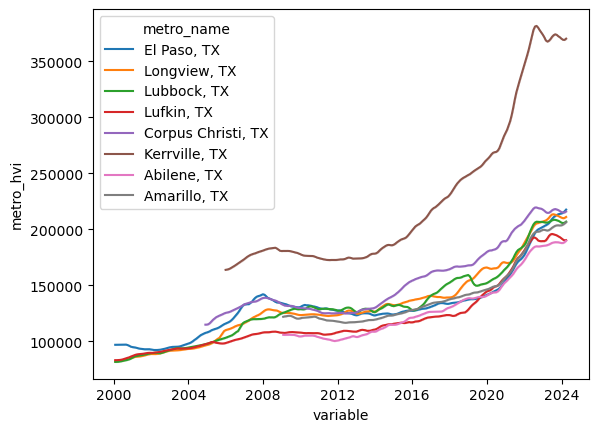

In [76]:
#Review metro hvi for 8 metros in Texas
z_TX = zillow_zip_data[zillow_zip_data['state_ID'] == 'TX'].reset_index()
z_TX_metros = z_TX['metro_name'].unique()
first8 = z_TX_metros[:8]
z_TX_first8 = z_TX[z_TX['metro_name'].isin(first8)]
sns.lineplot(x='variable', y='metro_hvi', hue='metro_name', data=z_TX_first8)
plt.show()

In [77]:
zillow_zip_data.T

variable,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,...,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31
zip_ID,99501,99502,99503,99504,99507,99508,99515,99516,99517,99518,...,26757,26761,26763,26808,26817,26865,83001,83013,83014,83414
zip_type,zip,zip,zip,zip,zip,zip,zip,zip,zip,zip,...,zip,zip,zip,zip,zip,zip,zip,zip,zip,zip
state_ID,AK,AK,AK,AK,AK,AK,AK,AK,AK,AK,...,WV,WV,WV,WV,WV,WV,WY,WY,WY,WY
state_name,Alaska,Alaska,Alaska,Alaska,Alaska,Alaska,Alaska,Alaska,Alaska,Alaska,...,West Virginia,West Virginia,West Virginia,West Virginia,West Virginia,West Virginia,Wyoming,Wyoming,Wyoming,Wyoming
state_type,state,state,state,state,state,state,state,state,state,state,...,state,state,state,state,state,state,state,state,state,state
metro_ID,394327,394327,394327,394327,394327,394327,394327,394327,394327,394327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metro_name,"Anchorage, AK","Anchorage, AK","Anchorage, AK","Anchorage, AK","Anchorage, AK","Anchorage, AK","Anchorage, AK","Anchorage, AK","Anchorage, AK","Anchorage, AK",...,"Winchester, VA","Winchester, VA","Winchester, VA","Winchester, VA","Winchester, VA","Winchester, VA","Jackson, WY","Jackson, WY","Jackson, WY","Jackson, WY"
metro_type,msa,msa,msa,msa,msa,msa,msa,msa,msa,msa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_hvi,143134.618852,146627.140466,117098.018759,129410.107549,148765.461401,130198.122085,162339.374678,225923.82516,133735.615548,119771.534106,...,204518.202013,235857.114204,215143.785323,256880.108864,276824.612761,301030.781526,2412911.077005,1590547.880787,4239772.506162,1698950.254568
state_HVI,134050.488951,134050.488951,134050.488951,134050.488951,134050.488951,134050.488951,134050.488951,134050.488951,134050.488951,134050.488951,...,160953.405292,160953.405292,160953.405292,160953.405292,160953.405292,160953.405292,340040.008209,340040.008209,340040.008209,340040.008209


In [78]:
zillow_zip_data.rename(columns={"state_HVI":"state_hvi"},inplace=True)

In [79]:
zillow_metro_state_clean.T

variable,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,...,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31
metro_ID,394327,394351,394388,394519,394870,394875,395083,395171,394337,394366,...,845166,394445,394462,394578,394631,394713,394771,395026,395032,395093
metro_name,"Anchorage, AK","Auburn, AL","Birmingham, AL","Daphne, AL","Mobile, AL","Montgomery, AL","Selma, AL","Tuscaloosa, AL","Arkadelphia, AR","Batesville, AR",...,"Mount Gay, WV","Casper, WY","Cheyenne, WY","Evanston, WY","Gillette, WY","Jackson, WY","Laramie, WY","Riverton, WY","Rock Springs, WY","Sheridan, WY"
metro_type,msa,msa,msa,msa,msa,msa,msa,msa,msa,msa,...,msa,msa,msa,msa,msa,msa,msa,msa,msa,msa
state_ID,AK,AL,AL,AL,AL,AL,AL,AL,AR,AR,...,WV,WY,WY,WY,WY,WY,WY,WY,WY,WY
metro_for_sale_inventory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,200.0,343.0,56.0,150.0,226.0,60.0,170.0,104.0,159.0
metro_hvi,138194.589336,133369.308212,113007.33724,119730.214536,89114.531321,112379.593603,47335.41567,103004.149531,72217.002688,71254.066203,...,NaN,286328.4202,365230.955252,301540.998731,313892.024741,1611017.361252,357008.632341,310202.717209,271442.557255,416612.091495
metro_med_days_to_close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metro_new_construct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metro_new_listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,62.0,107.0,15.0,48.0,56.0,23.0,32.0,29.0,32.0
metro_pct_abv_list,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
zillow_state_df_metrics.T

variable,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,2000-01-31,...,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31,2024-03-31
State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
RegionName,Alaska,Alabama,Arkansas,Arizona,California,Colorado,Connecticut,District of Columbia,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Virginia,Vermont,Washington,Wisconsin,West Virginia,Wyoming
RegionType,state,state,state,state,state,state,state,state,state,state,...,state,state,state,state,state,state,state,state,state,state
state_HVI,134050.488951,98522.947066,86316.3176,138432.405665,198015.154744,182333.50603,172712.72231,185200.838973,149099.563088,113339.264735,...,299395.496466,316359.070827,304537.877556,528822.190972,391283.649538,384416.422941,605769.588316,298246.778571,160953.405292,340040.008209


In [81]:
zillow_zip_data.to_pickle('../Data/zillow_zip_data.pkl')
zillow_metro_state_clean.to_pickle('../Data/zillow_metro_data.pkl')
zillow_state_df_metrics.to_pickle('../Data/zillow_state_data.pkl')